<a href="https://colab.research.google.com/github/kundajelab/feature_interactions/blob/master/zeropadding/EvaluateModelsGivenPredictionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/train_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/train_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_orig_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_orig_pos.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_pos_interactions.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_neg_maineff.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/shuff_toanalyze_orig_oraclepred_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/shuff_toanalyze_orig_oraclepred_pos.txt.gz

--2020-06-29 20:09:44--  https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_neg_labels.txt.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/zeropadding/data/test_neg_labels.txt.gz [following]
--2020-06-29 20:09:44--  https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/zeropadding/data/test_neg_labels.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 529495 (517K) [application/octet-stream]
Saving to: ‘test_neg_labels.txt.gz’

test_neg

In [3]:
!gunzip -f *.gz

In [4]:
!md5sum *

md5sum: sample_data: Is a directory
6093d9043a00d2bfa3fdc6859572e9b7  shuff_toanalyze_orig_oraclepred_neg.txt
d2e04fad6e6e98c3f9c3ef1fc08fe23b  shuff_toanalyze_orig_oraclepred_pos.txt
39fc6fc8d08dd8841426d1d2fe494012  test_neg_labels.txt
79d5b7333ba54c24589fcaacf89012f4  test_pos_labels.txt
002b916226815c1d826486666c2d2473  test_toanalyze_groundtruth_neg_maineff.txt
dbdbb4750187547a5fe035f3df27c87f  test_toanalyze_groundtruth_orig_neg.txt
14d291068b82b0c7db298b90e2155a3a  test_toanalyze_groundtruth_orig_pos.txt
adb5edc65ee6060f2770f19bf344a48c  test_toanalyze_groundtruth_pos_interactions.txt
28cc4a0c1e8884dbeab0c328b1a29f07  test_toanalyze_orig_neg_labels.txt
7d1ba501734d12678c78f53cc2ab7e54  test_toanalyze_orig_pos_labels.txt
8cd9559ad168d2e7f0a4d20e906e6e02  train_toanalyze_orig_neg_labels.txt
58f3dced1b6ae204e8450b68f6c9f19b  train_toanalyze_orig_pos_labels.txt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/drive/My\ Drive/colab_notebook_data/feature_interactions/model_preds_zeropadding/ model_preds
!ls model_preds

#!wget https://github.com/kundajelab/feature_interactions/raw/619bc75/av/model_preds.tgz
#!tar -xzf model_preds.tgz model_preds

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed200_dmeaz.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed300_vwlzj.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed400_vyqvb.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed500_msloc.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed100_tiefn.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed200_iwhrl.h5
negcontrol_

In [6]:
import numpy as np
from collections import namedtuple


#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels) 
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return


def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1


def anscombe_transform(vals):
  assert np.min(vals)>=(-3.0/8), np.min(vals)
  return 2*np.sqrt(vals + 3.0/8)


def load_onehot_sequences(filename):
  return np.array([one_hot_encode_along_channel_axis(x.rstrip())
                   for x in open(filename)])


def load_numerical(filename):
  return np.array([float(x.rstrip()) for x in open(filename)])


def read_labels_and_oracle(filename):
  labels = np.array([float(x.split("\t")[0]) for
                      x in open(filename)])
  oracle = np.array([float(x.split("\t")[1]) for
                      x in open(filename)])
  return labels, oracle


test_pos_labels, test_pos_oracle =\
  read_labels_and_oracle("test_pos_labels.txt")
test_neg_labels, test_neg_oracle =\
  read_labels_and_oracle("test_neg_labels.txt")

test_toanalyze_orig_neg_labels =\
  load_numerical("test_toanalyze_orig_neg_labels.txt")
test_toanalyze_orig_pos_labels =\
  load_numerical("test_toanalyze_orig_pos_labels.txt")

train_toanalyze_orig_neg_labels =\
  load_numerical("train_toanalyze_orig_neg_labels.txt")
train_toanalyze_orig_pos_labels =\
  load_numerical("train_toanalyze_orig_pos_labels.txt")

test_toanalyze_groundtruth_neg_maineff=\
  load_numerical("test_toanalyze_groundtruth_neg_maineff.txt")
test_toanalyze_groundtruth_pos_interactions=\
  load_numerical("test_toanalyze_groundtruth_pos_interactions.txt")

shuff_toanalyze_orig_oraclepred_neg =\
  load_numerical("shuff_toanalyze_orig_oraclepred_neg.txt")
shuff_toanalyze_orig_oraclepred_pos =\
  load_numerical("shuff_toanalyze_orig_oraclepred_pos.txt")

In [102]:
from collections import namedtuple
import scipy.stats
import h5py
import numpy as np


def anscombemse_loss(preds, labels):
  return np.square(anscombe_transform(preds)-anscombe_transform(labels))


def rescalepoisson_loss(preds, labels):
  rescaled_preds = preds*100
  return rescaled_preds - labels*np.log(rescaled_preds)


#positive means interaction improved the loss
def compute_lossimprovement(orig_preds, maineff_preds, labels,
                            lossfunc, valthresh):
  assert np.min(orig_preds) > valthresh, np.min(orig_preds)
  assert np.min(labels) > valthresh, np.min(labels)
  #for anscomebmse: for the purpose of avoiding taking sqrt of negative number,
  # make sure maineff preds > (-3.0/8). For poisson: need a positive number.
  #The reason we can get smaller
  # maineff preds than this is that we are computing main effects in counts
  # space, whereas model predictions are in anscombe transform space.
  if (np.min(maineff_preds) < valthresh):
    print("Warning: too-low maineff preds in % examples:",
          np.mean(maineff_preds < valthresh))
    maineff_preds = np.maximum(maineff_preds, valthresh)
  
  maineffpreds_loss = lossfunc(preds=maineff_preds, labels=labels)
  origpreds_loss = lossfunc(preds=orig_preds, labels=labels)

  return ((maineffpreds_loss - origpreds_loss),
          maineffpreds_loss, origpreds_loss)


InteractionEffectData = namedtuple("InteractionEffectData",
  ["orig_preds", "A_main_eff", "B_main_eff", "inter_eff", "maineff_preds"])


def get_interactioneffectdata(modelpredsfile, perturbedseqskey):
  model_h5 = h5py.File(modelpredsfile, "r")
  orig_preds = np.array(model_h5[perturbedseqskey]['orig_onehot_preds'])
  Aoff_preds = np.array(model_h5[perturbedseqskey]['Aoff_onehot_preds'])
  Boff_preds = np.array(model_h5[perturbedseqskey]['Boff_onehot_preds'])
  bothoff_preds = np.array(model_h5[perturbedseqskey]['bothoff_onehot_preds'])
  model_h5.close()

  A_main_eff = (Boff_preds - bothoff_preds)
  B_main_eff = (Aoff_preds - bothoff_preds)
  inter_eff = (orig_preds - bothoff_preds) - (A_main_eff + B_main_eff)
  maineff_preds = bothoff_preds + A_main_eff + B_main_eff

  return InteractionEffectData(orig_preds=orig_preds, A_main_eff=A_main_eff,
                               B_main_eff=B_main_eff, inter_eff=inter_eff,
                               maineff_preds=maineff_preds)


InteractionAnalysis = namedtuple("InteractionAnalysis",
  ["overall_test_loss",
   "test_toanalyze_maineffpreds_loss",
   "test_toanalyze_origpreds_loss",
   
   "test_toanalyze_interactioneffectdata",
   "test_toanalyze_lossimprovement",
   
   "controltest_toanalyze_lossimprovement",

   "shuff_toanalyze_interactioneffectdata",
   "shuff_toanalyze_lossimprovement",

   "train_toanalyze_interactioneffectdata",
   "train_toanalyze_lossimprovement",

   "controltrain_toanalyze_lossimprovement",
   
   "test_toanalyze_intereff_wilcoxon",
   "test_toanalyze_lossimprovement_wilcoxon",
   "test_toanalyze_lossimprovement_mannwhit",
   "test_v_controltest_lossimp_mannwhit",
   "test_v_controltest_intereff_mag_mannwhit",
   
   "train_toanalyze_lossimprovement_wilcoxon",
   "train_toanalyze_lossimprovement_mannwhit",
   "train_v_controltrain_lossimp_mannwhit",
   "train_v_test_lossimp_mannwhit",
   "train_v_controltrain_intereff_mag_mannwhit",

   "test_v_shuff_intereff_mag_mannwhit",
   "test_v_shuff_lossimp_mannwhit"
   ])


def perform_interaction_analysis(modelpredsfile,
                                 all_test_labels,
                                 all_test_oracle,
                                 test_toanalyze_labels,
                                 train_toanalyze_labels,
                                 shuff_toanalyze_oraclepreds,
                                 lossfunc, valthresh):
  
  test_toanalyze_interactioneffectdata = get_interactioneffectdata(
          modelpredsfile=modelpredsfile,
          perturbedseqskey='test_toanalyze_perturbedseqs')
  overall_test_loss = lossfunc(
        preds=np.array(h5py.File(modelpredsfile,"r")["all_test_preds"][:]),
        labels=all_test_labels)
  
  if ("negcontrol" in modelpredsfile):
    print(modelpredsfile)
    plt.scatter(np.array(h5py.File(modelpredsfile,"r")["all_test_preds"][:]),
                all_test_oracle, alpha=0.01)
    plt.plot(all_test_oracle, all_test_oracle, color="black")
    plt.xlabel("Test Preds")
    plt.ylabel("Test Oracle")
    plt.show()

    pred_maineff = (test_toanalyze_interactioneffectdata.A_main_eff
                    + test_toanalyze_interactioneffectdata.B_main_eff)
    plt.scatter(test_toanalyze_groundtruth_neg_maineff, pred_maineff)
    plt.plot(test_toanalyze_groundtruth_neg_maineff,
            test_toanalyze_groundtruth_neg_maineff,
            color="black")
    plt.xlabel("(Neg control) ground truth A_main_eff + B_main_eff")
    plt.ylabel("Pred A_main_eff + B_main_eff")
    plt.show()

    mainefferror = test_toanalyze_groundtruth_neg_maineff - pred_maineff
    intereff = test_toanalyze_interactioneffectdata.inter_eff
    plt.scatter(mainefferror, intereff)
    plt.plot(mainefferror, mainefferror, color="black")
    plt.xlabel("mainefferror")
    plt.ylabel("intereff")
    plt.show()

  controltest_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltest_toanalyze_perturbedseqs')

  (test_toanalyze_lossimprovement, test_toanalyze_maineffpreds_loss,
   test_toanalyze_origpreds_loss)= compute_lossimprovement(
      orig_preds=test_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=test_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  controltest_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltest_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltest_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  
  train_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='train_toanalyze_perturbedseqs')
  controltrain_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltrain_toanalyze_perturbedseqs')
  
  (train_toanalyze_lossimprovement, train_toanalyze_maineffpreds_loss,
   train_toanalyze_origpreds_loss) = compute_lossimprovement(
      orig_preds=train_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=train_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  controltrain_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltrain_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltrain_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  
  shuff_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='shuff_toanalyze_perturbedseqs')
  shuff_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=shuff_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=shuff_toanalyze_interactioneffectdata.maineff_preds,
      labels=shuff_toanalyze_oraclepreds,
      lossfunc=lossfunc, valthresh=valthresh)
  
  test_toanalyze_intereff_wilcoxon = scipy.stats.wilcoxon(
      x=test_toanalyze_interactioneffectdata.inter_eff,
      alternative="two-sided")
  
  test_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=test_toanalyze_lossimprovement,
    alternative="greater")
  test_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=test_toanalyze_maineffpreds_loss,
    y=test_toanalyze_origpreds_loss,
    alternative="greater")
  test_v_controltest_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=controltest_toanalyze_lossimprovement,
      alternative="greater")
  test_v_controltest_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltest_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=train_toanalyze_lossimprovement,
    alternative="greater")
  train_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=train_toanalyze_maineffpreds_loss,
    y=train_toanalyze_origpreds_loss,
    alternative="greater")
  train_v_controltrain_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=controltrain_toanalyze_lossimprovement,
      alternative="greater")
  train_v_controltrain_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(train_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltrain_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_v_test_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=test_toanalyze_lossimprovement,
      alternative="greater")
  
  test_v_shuff_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(shuff_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  test_v_shuff_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=shuff_toanalyze_lossimprovement,
      alternative="greater")
  
  return InteractionAnalysis(
      
      overall_test_loss=overall_test_loss,
      test_toanalyze_maineffpreds_loss=test_toanalyze_maineffpreds_loss,
      test_toanalyze_origpreds_loss=test_toanalyze_origpreds_loss,

      test_toanalyze_interactioneffectdata=
        test_toanalyze_interactioneffectdata,
      test_toanalyze_lossimprovement=test_toanalyze_lossimprovement,

      controltest_toanalyze_lossimprovement=
       controltest_toanalyze_lossimprovement,
      
      shuff_toanalyze_interactioneffectdata=
        shuff_toanalyze_interactioneffectdata,
      shuff_toanalyze_lossimprovement=
        shuff_toanalyze_lossimprovement,

      train_toanalyze_interactioneffectdata=
        train_toanalyze_interactioneffectdata,
      train_toanalyze_lossimprovement=train_toanalyze_lossimprovement,

      controltrain_toanalyze_lossimprovement=
        controltrain_toanalyze_lossimprovement,

      test_toanalyze_intereff_wilcoxon=
        test_toanalyze_intereff_wilcoxon,
      test_toanalyze_lossimprovement_wilcoxon=
        test_toanalyze_lossimprovement_wilcoxon,
      test_toanalyze_lossimprovement_mannwhit=
        test_toanalyze_lossimprovement_mannwhit,
      test_v_controltest_lossimp_mannwhit=
        test_v_controltest_lossimp_mannwhit,
      test_v_controltest_intereff_mag_mannwhit=
        test_v_controltest_intereff_mag_mannwhit,
      
      train_toanalyze_lossimprovement_wilcoxon=
        train_toanalyze_lossimprovement_wilcoxon,
      train_toanalyze_lossimprovement_mannwhit=
        train_toanalyze_lossimprovement_mannwhit,
      train_v_controltrain_lossimp_mannwhit=
        train_v_controltrain_lossimp_mannwhit,
      train_v_controltrain_intereff_mag_mannwhit=
        train_v_controltrain_intereff_mag_mannwhit,

      train_v_test_lossimp_mannwhit=train_v_test_lossimp_mannwhit,

      test_v_shuff_intereff_mag_mannwhit=test_v_shuff_intereff_mag_mannwhit,
      test_v_shuff_lossimp_mannwhit=test_v_shuff_lossimp_mannwhit
    )

In [103]:
import glob

MODEL_PREDS_FOLDER = "model_preds"
#negcontrol_modelpredsfiles =\
#  glob.glob(MODEL_PREDS_FOLDER+"/negcontrol_*anscombemse*_seed*.h5")
#poscontrol_modelpredsfiles =\
#  glob.glob(MODEL_PREDS_FOLDER+"/poscontrol_*anscombemse*_seed*.h5")

negcontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/negcontrol_*rescalepoisson*_seed*.h5")

poscontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/poscontrol_*rescalepoisson*_seed*.h5")

#negcontrol_modelfiles = glob.glob("trained_models//negcontrol_*_seed100*.h5")
#poscontrol_modelfiles = glob.glob("trained_models//poscontrol_*_seed100*.h5")

#negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5""".split("\n")
#poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5""".split("\n")

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed100_nlwef.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed100_nlwef.h5


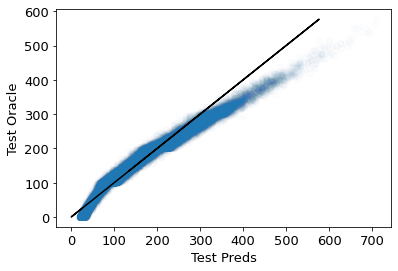

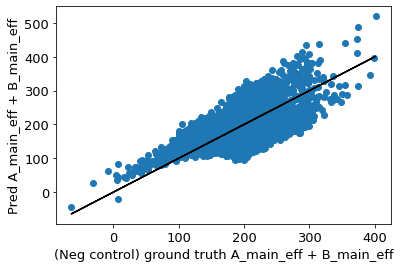

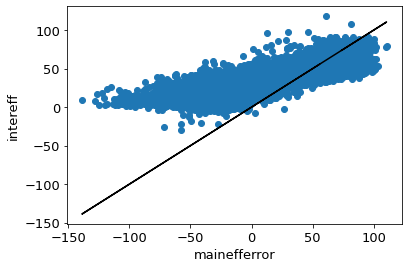

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed100_lawff.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed100_lawff.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


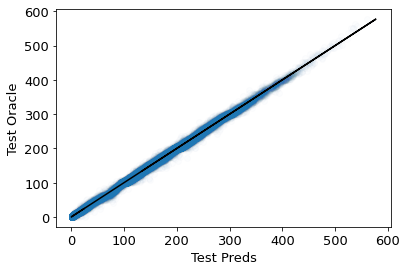

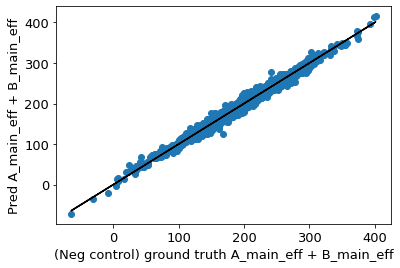

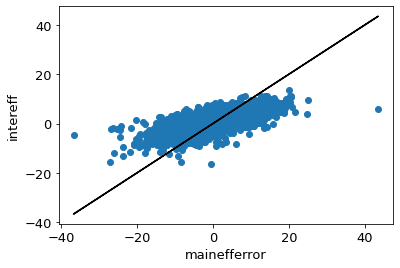

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


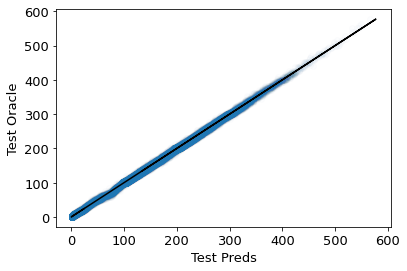

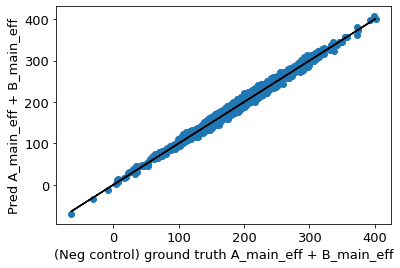

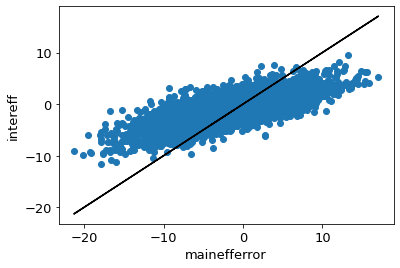

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed100_tlobk.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed100_tlobk.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


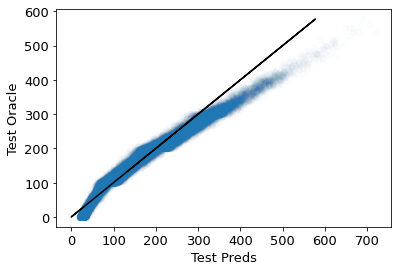

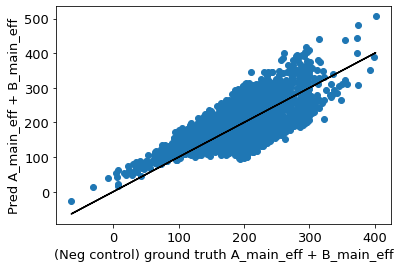

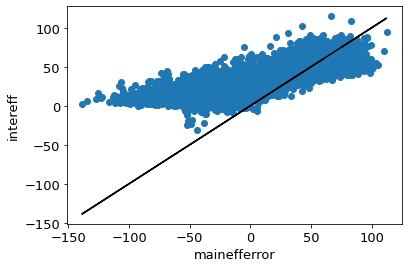

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed100_ntgvf.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed100_ntgvf.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


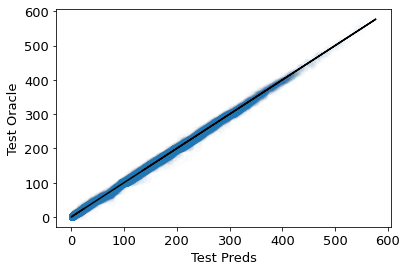

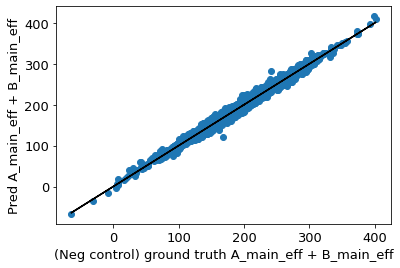

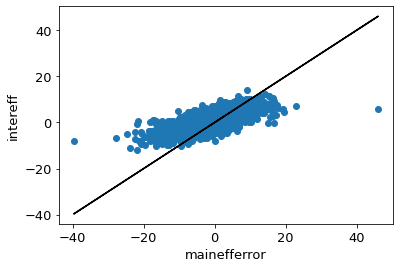

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_koolv.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_koolv.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


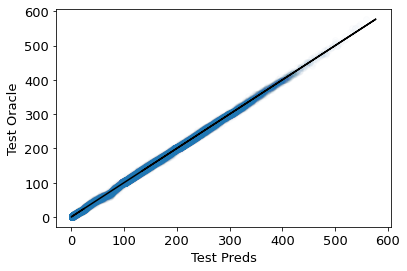

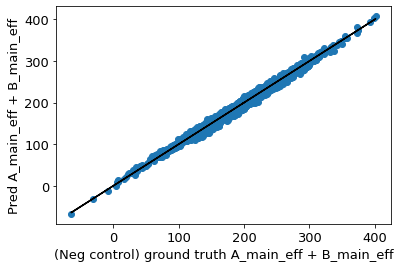

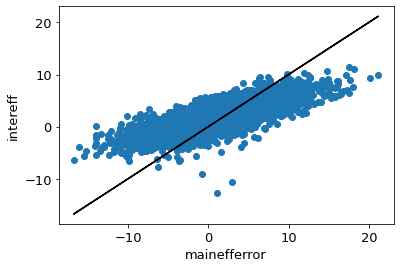

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed100_hkvqp.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed100_hkvqp.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


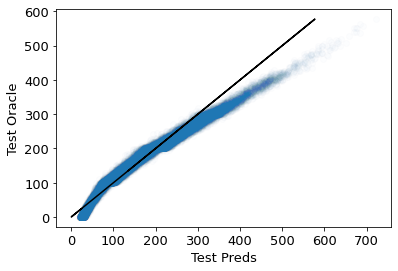

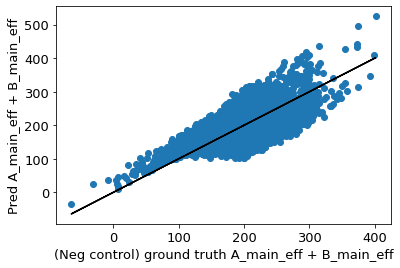

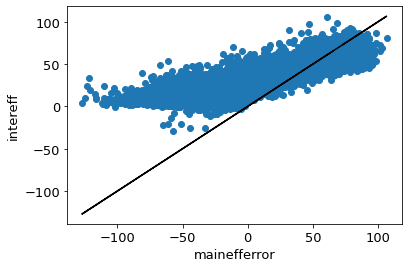

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed100_ojogi.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed100_ojogi.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


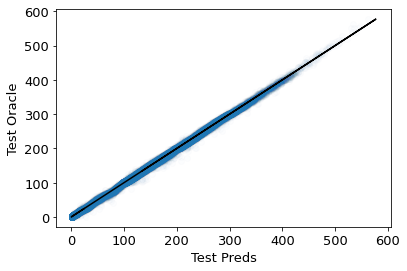

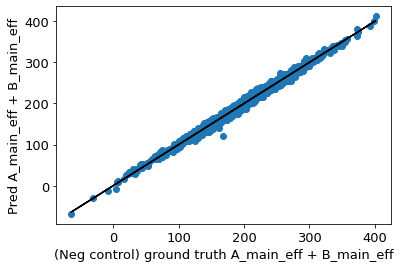

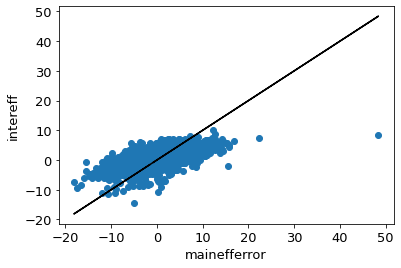

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_mtaow.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_mtaow.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


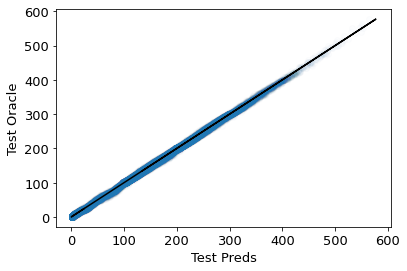

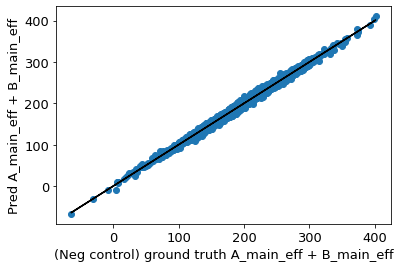

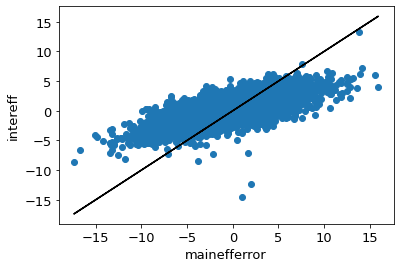

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed200_zrhsq.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed200_zrhsq.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


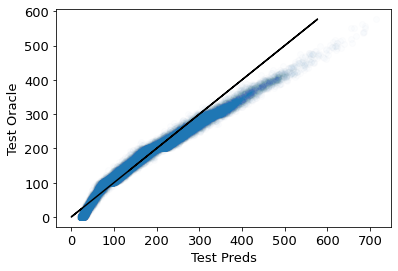

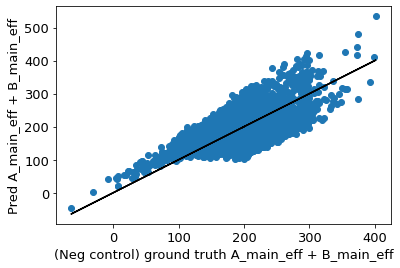

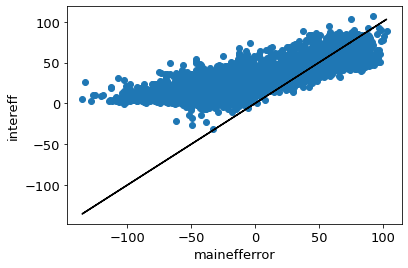

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed200_rhgkp.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed200_rhgkp.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


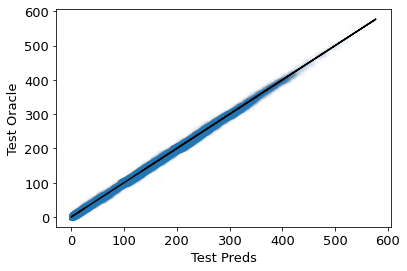

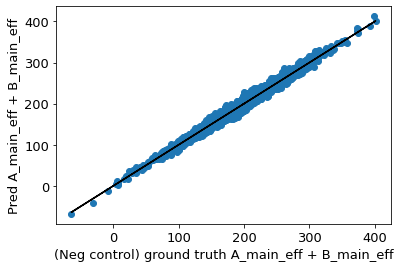

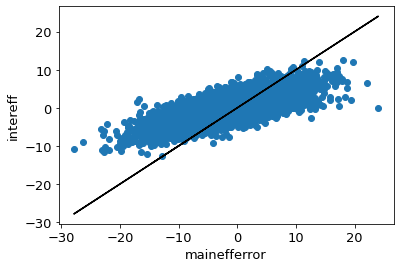

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_oqbpf.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_oqbpf.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


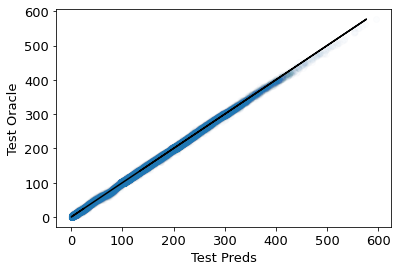

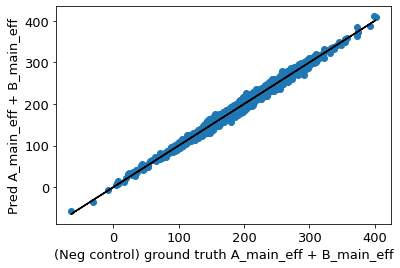

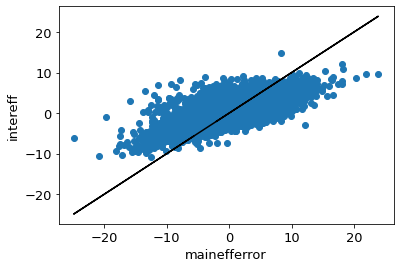

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed200_bihfz.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed200_bihfz.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


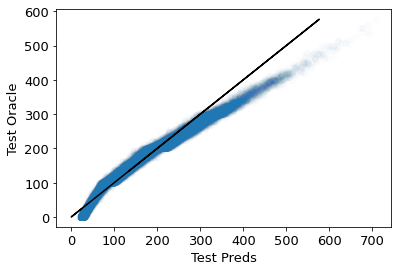

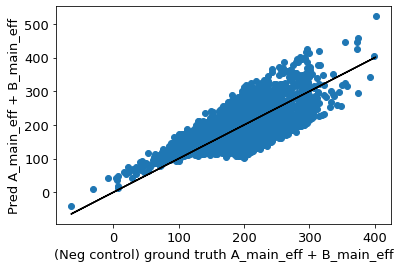

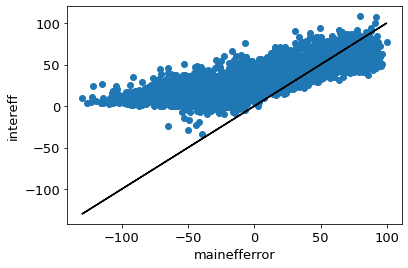

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed200_fxrui.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed200_fxrui.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


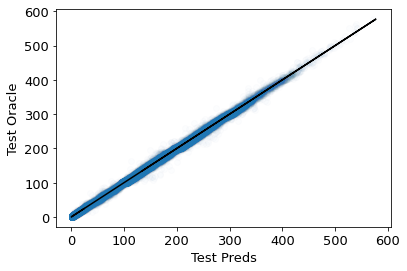

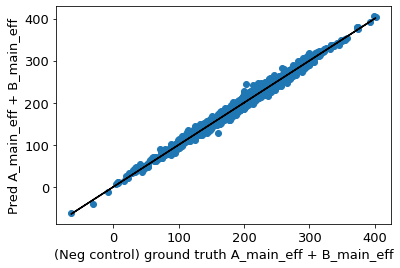

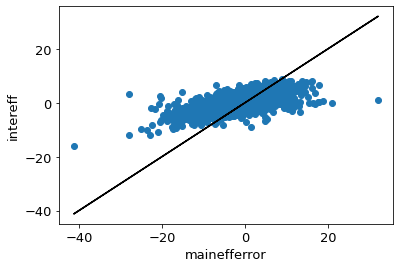

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


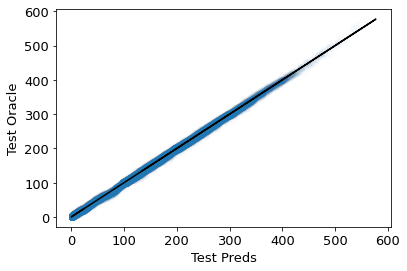

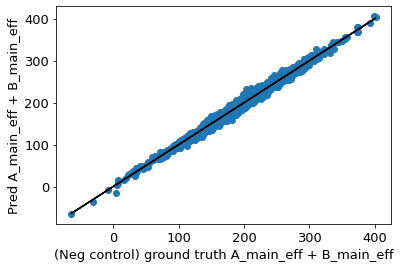

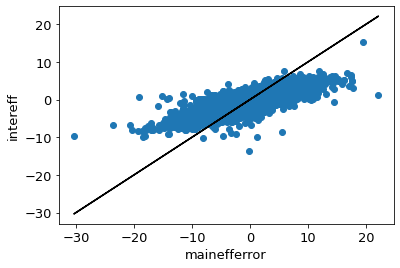

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed200_sqdbm.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed200_sqdbm.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


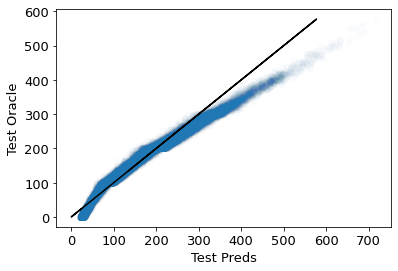

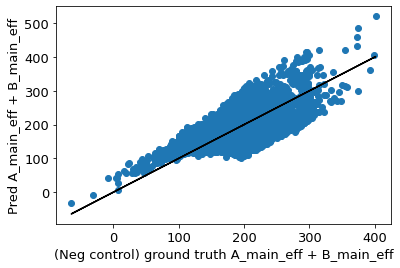

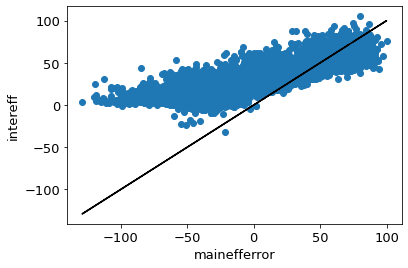

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_cmmyx.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_cmmyx.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


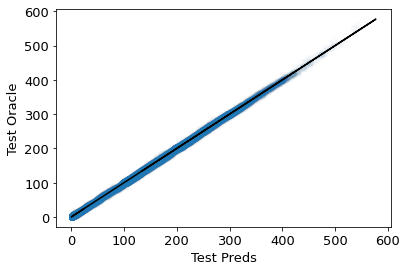

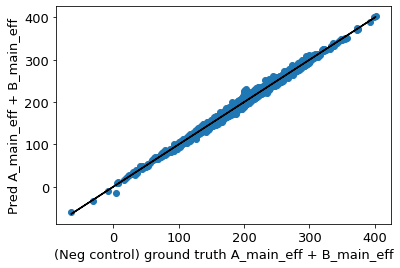

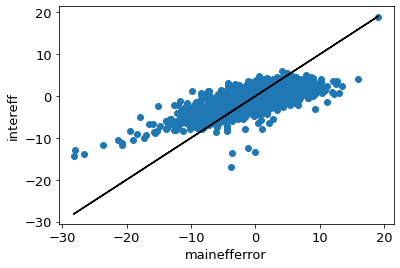

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed200_plosl.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed200_plosl.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


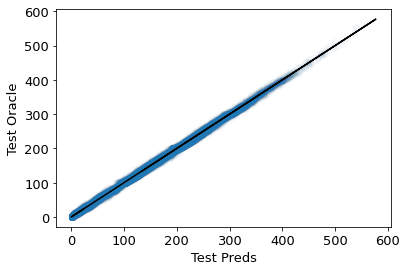

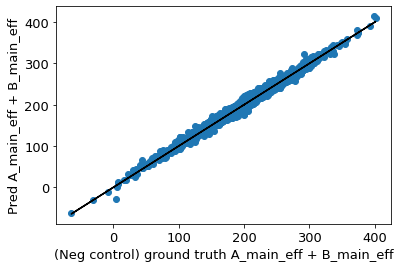

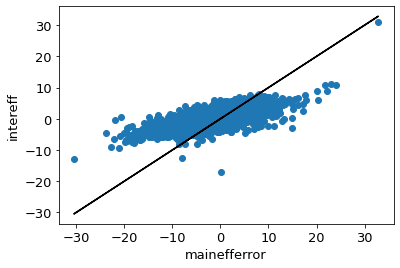

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed300_giyhi.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed300_giyhi.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


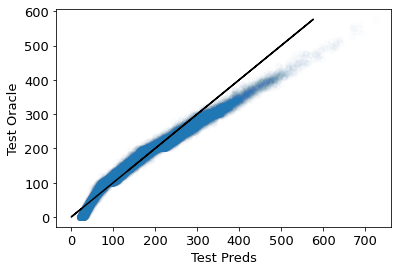

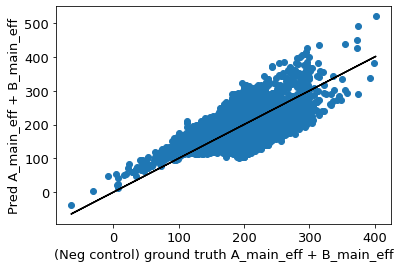

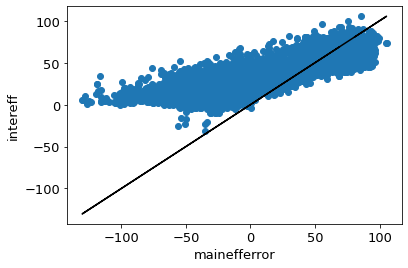

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed300_pbhsj.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed300_pbhsj.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


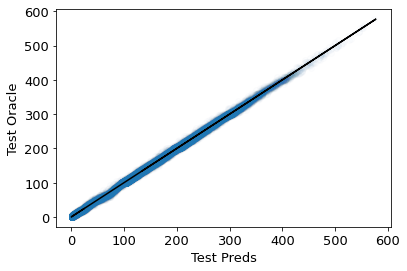

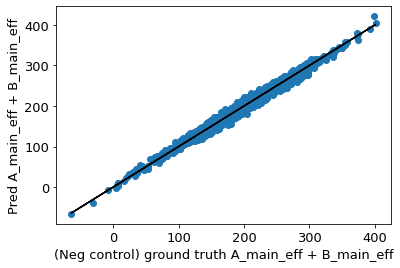

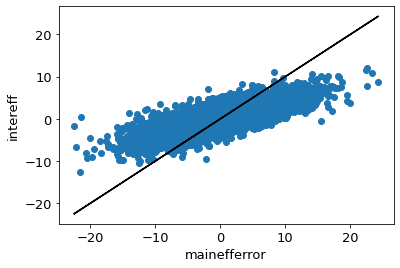

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed300_umbcx.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed300_umbcx.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


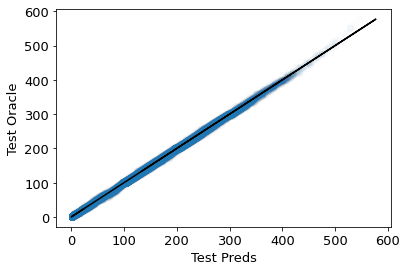

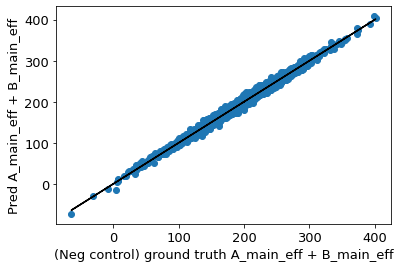

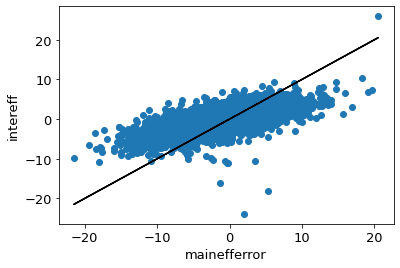

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed300_fmqxy.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed300_fmqxy.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


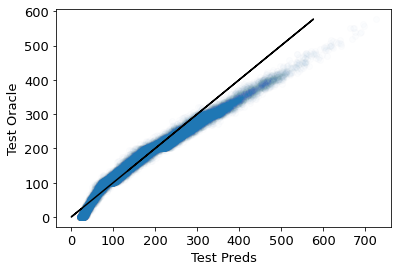

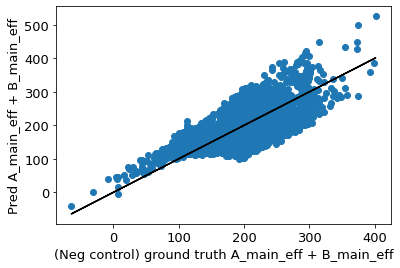

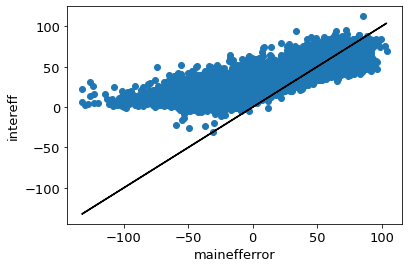

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed300_ehvbn.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed300_ehvbn.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


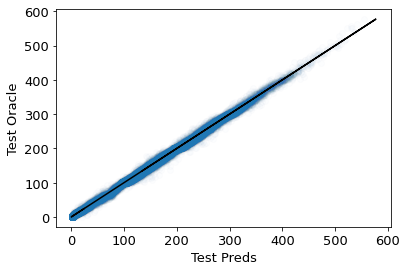

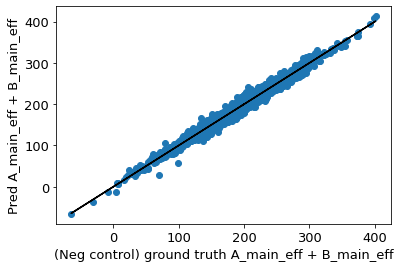

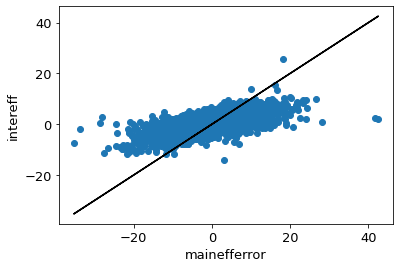

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed300_umhto.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed300_umhto.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


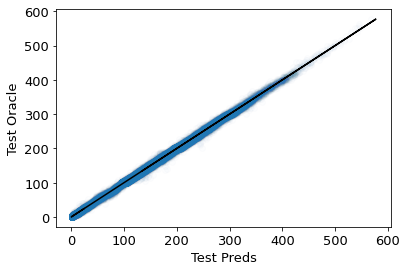

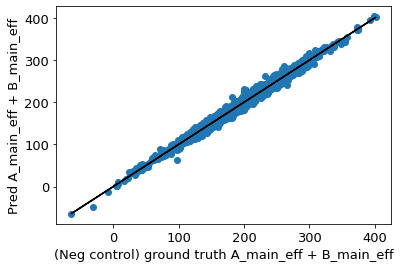

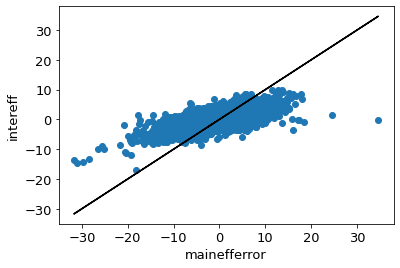

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed300_juibt.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed300_juibt.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


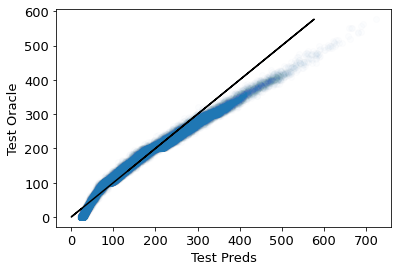

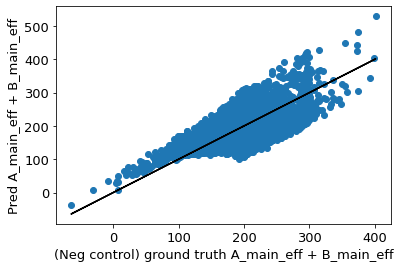

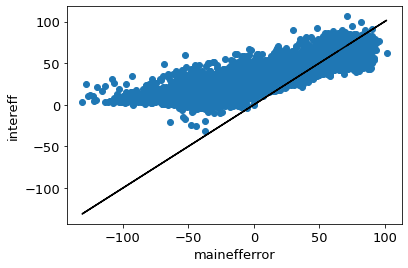

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed300_ydzzn.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed300_ydzzn.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


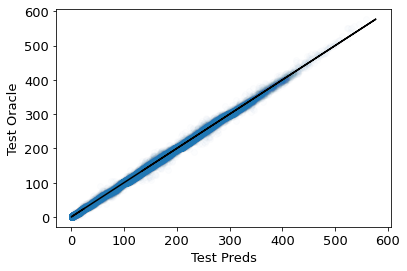

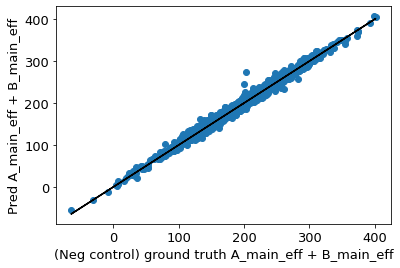

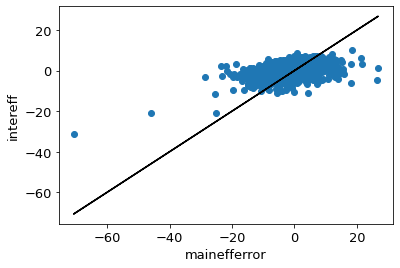

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed300_twddp.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed300_twddp.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


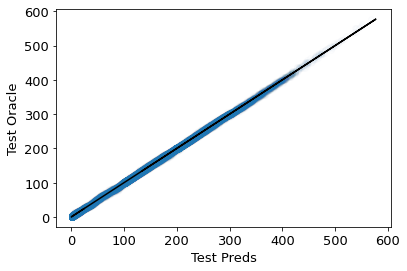

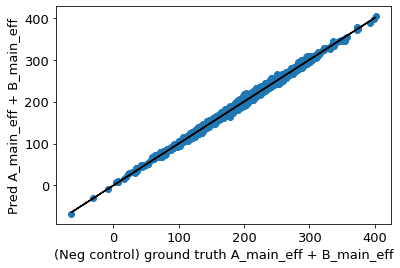

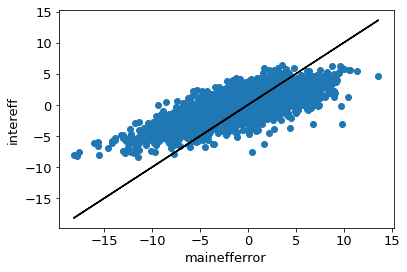

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed400_rrtmx.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed400_rrtmx.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


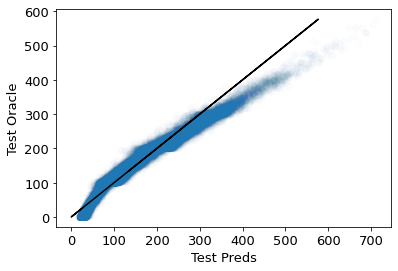

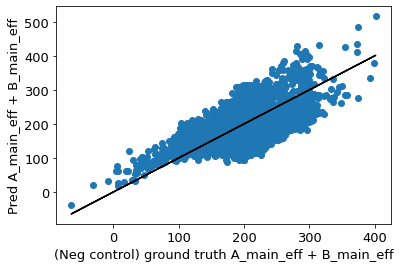

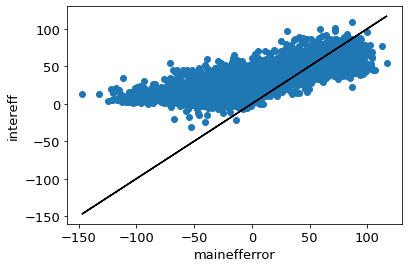

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed400_klhqe.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed400_klhqe.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


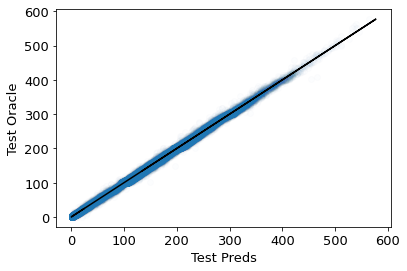

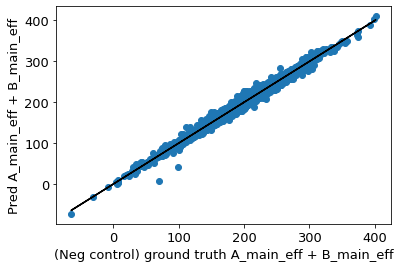

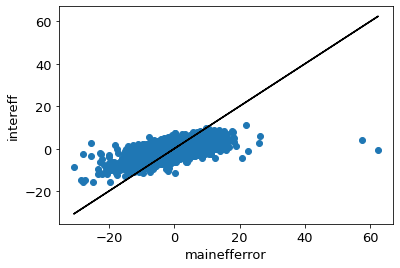

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed400_hctws.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed400_hctws.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


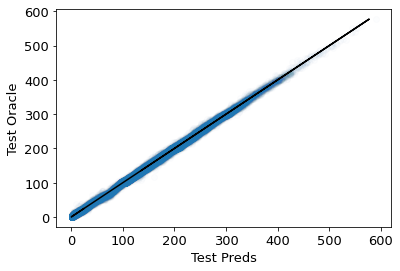

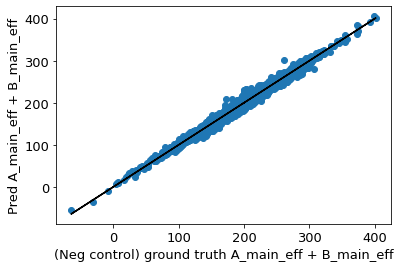

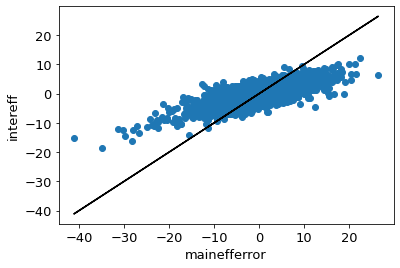

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed400_hdntv.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed400_hdntv.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


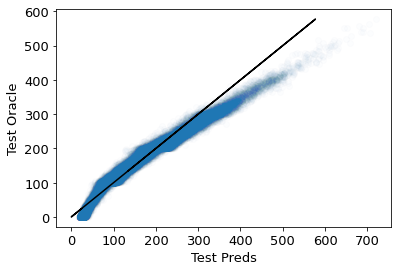

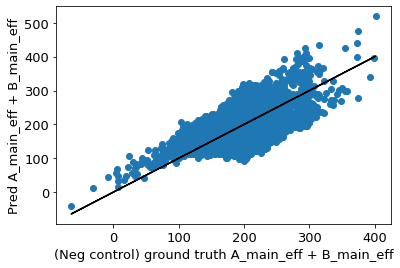

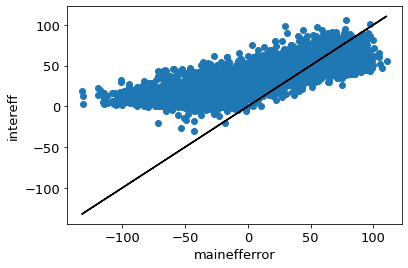

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed400_onwci.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed400_onwci.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


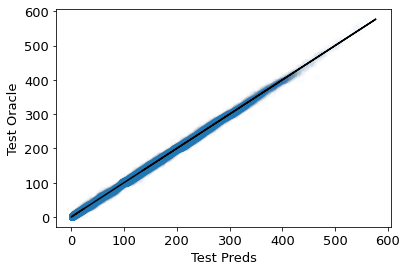

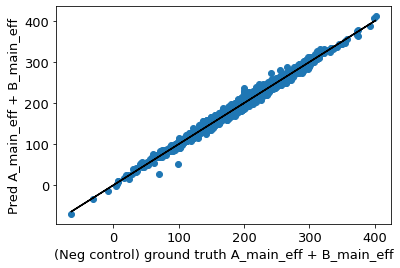

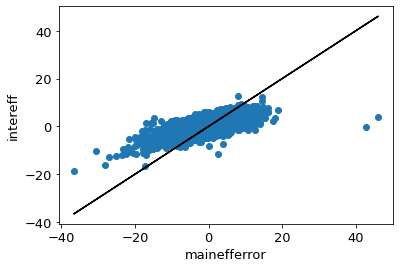

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed400_egnrs.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed400_egnrs.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


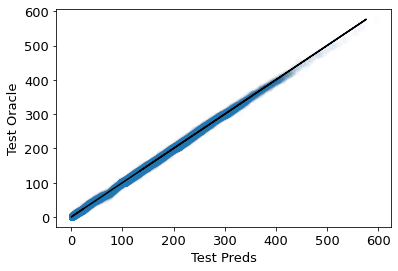

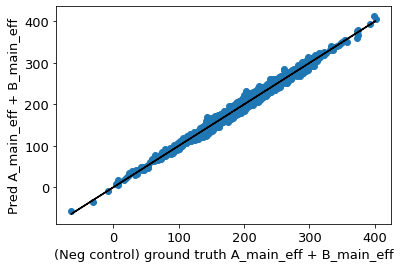

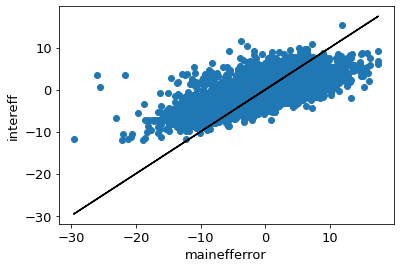

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed400_bsmim.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed400_bsmim.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


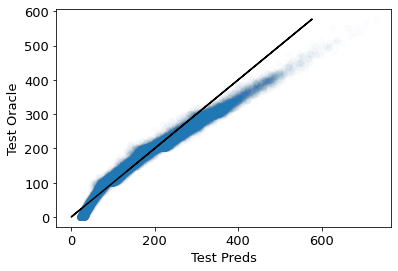

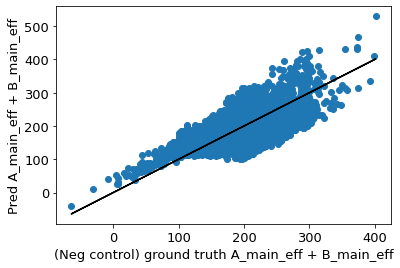

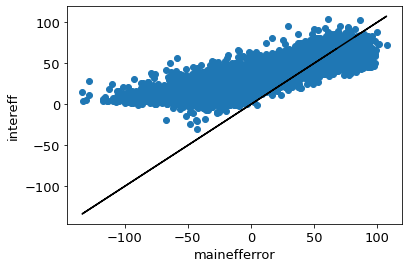

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed400_ljhxs.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed400_ljhxs.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


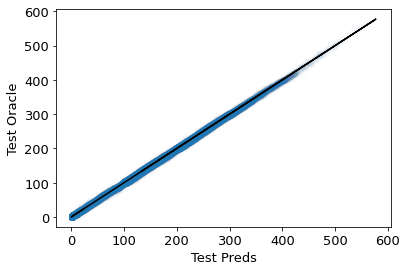

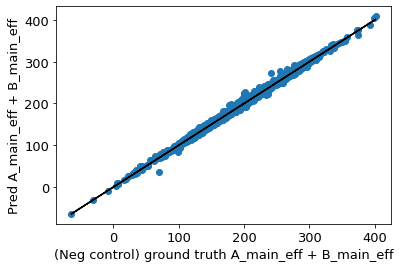

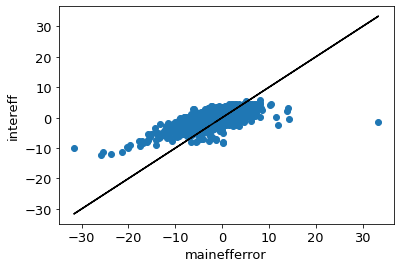

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed400_ociwk.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed400_ociwk.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


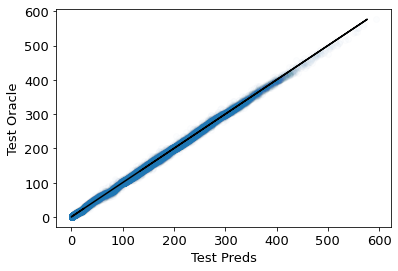

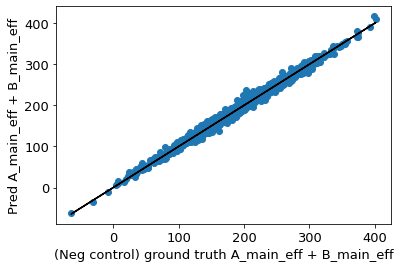

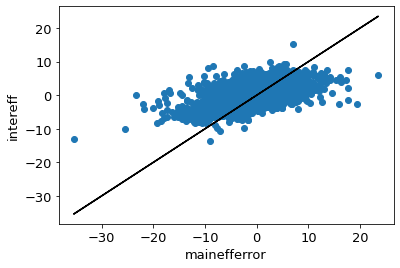

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed500_guxmk.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed500_guxmk.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


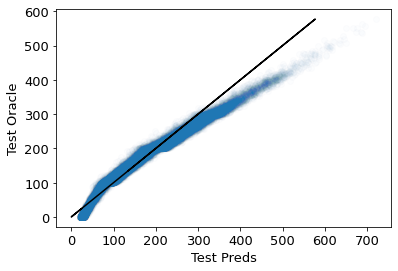

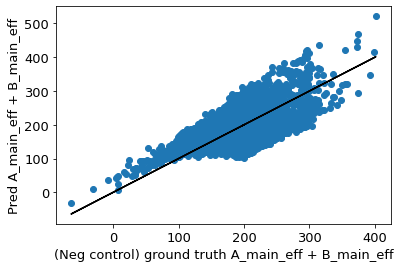

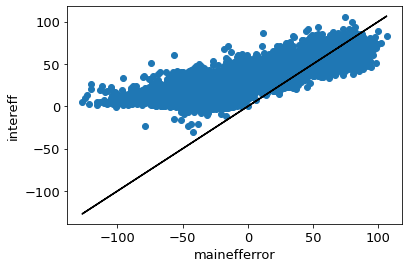

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed500_xmxvx.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed500_xmxvx.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


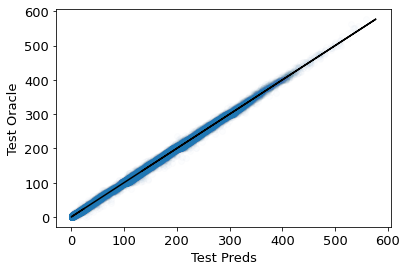

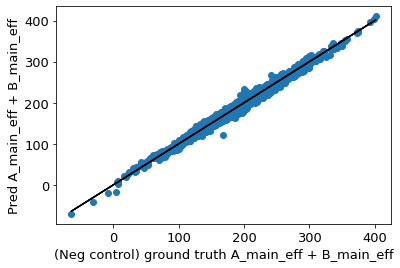

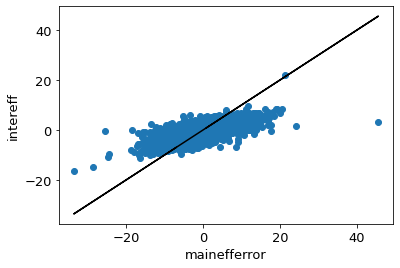

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed500_xnkrd.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed500_xnkrd.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


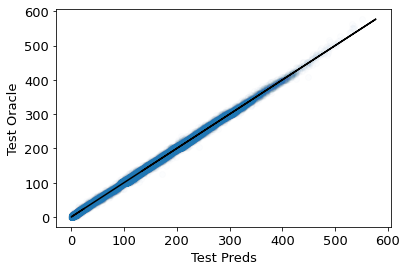

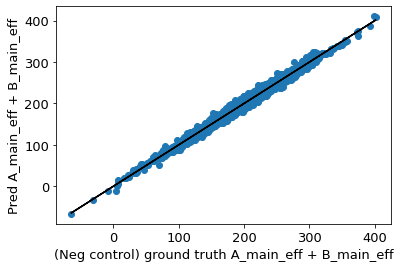

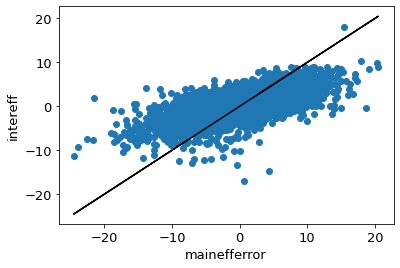

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed500_wbntp.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed500_wbntp.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


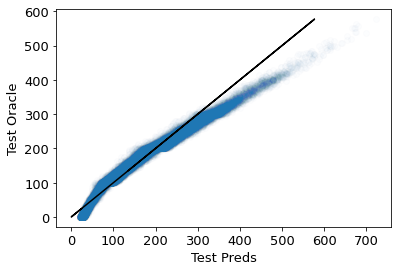

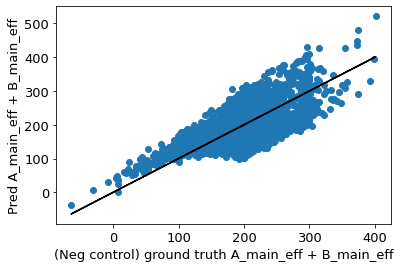

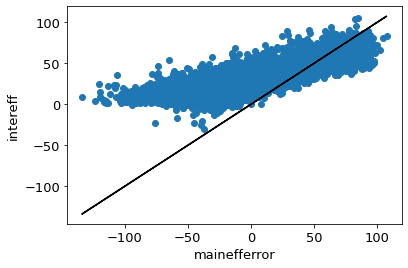

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed500_kiyug.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed500_kiyug.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


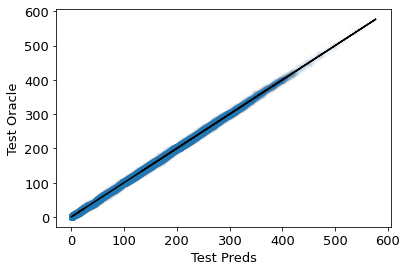

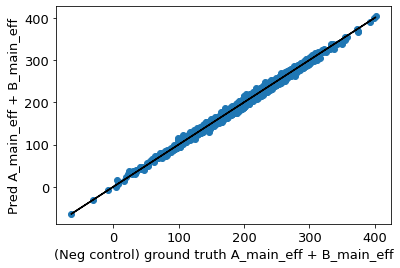

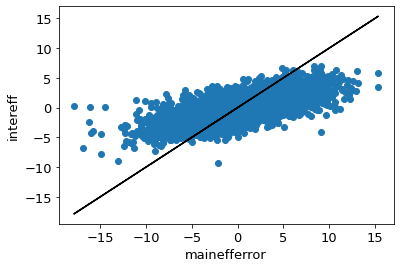

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed500_pczyj.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed500_pczyj.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


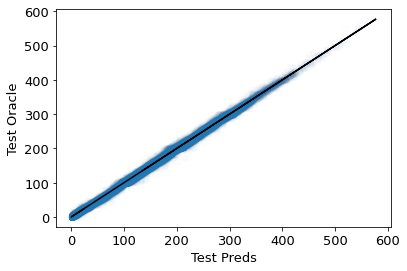

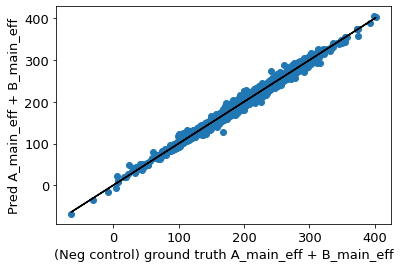

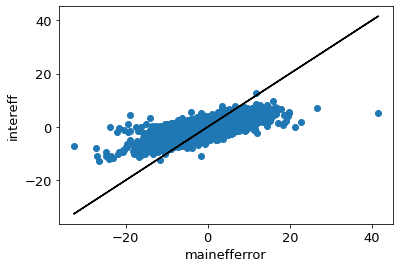

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed500_gpagt.h5
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed500_gpagt.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


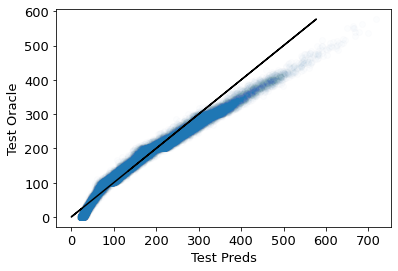

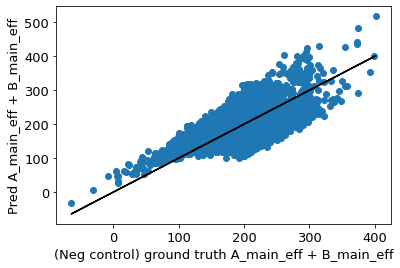

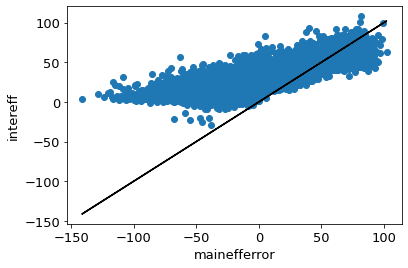

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed500_fsada.h5
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed500_fsada.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


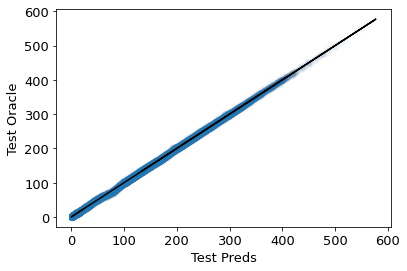

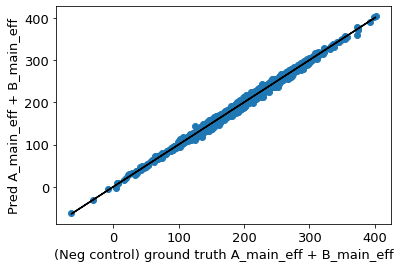

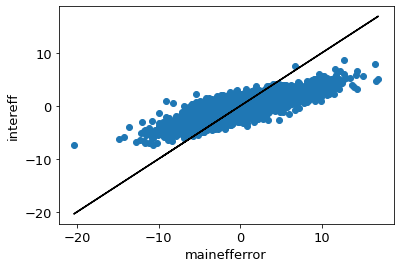

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed500_rgimu.h5
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed500_rgimu.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


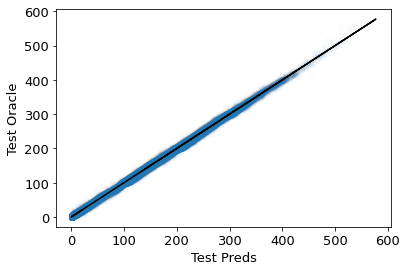

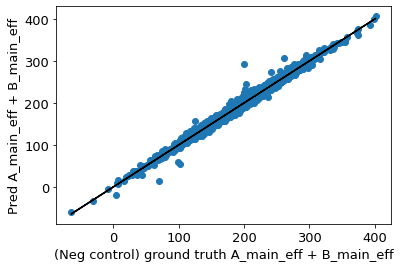

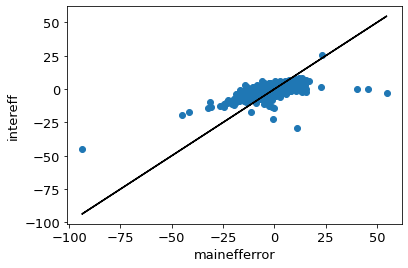

On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed100_doaqv.h5
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_wwnus.h5
On model model_preds/poscontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed100_lszqy.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed100_jyluo.h5
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_vlqcx.h5
On model model_preds/poscontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed200_cbulq.h5
On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed200_lsnmc.h5
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_ejwnt.h5
On model model_preds/poscontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed200_zgbwk.h5
On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed200_hksin.h5
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_xmzrw.h5
On model model_preds/poscontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed200_epbla.h5
On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_omcmq.h5
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed200_

In [104]:
import keras
from keras.models import load_model
from collections import OrderedDict

def run_analysis_on_multiple_models(
    modelpredsfiles,
    all_test_labels, all_test_oracle,
    test_toanalyze_labels,
    train_toanalyze_labels,
    shuff_toanalyze_oraclepreds):
  results = OrderedDict()
  for modelpredsfile in modelpredsfiles:
    print("On model", modelpredsfile)
    if ("rescalepoisson" in modelpredsfile):
      lossfunc = rescalepoisson_loss
      valthresh = 0
    elif ("anscombemse" in modelpredsfile):
      lossfunc = anscombemse_loss
      valthresh = -3.0/8
    else:
      raise RuntimeError("Specify loss to use for",modelpredsfile)

    interaction_analysis = perform_interaction_analysis(
      modelpredsfile=modelpredsfile,
      all_test_labels=all_test_labels,
      all_test_oracle=all_test_oracle,
      test_toanalyze_labels=test_toanalyze_labels,
      train_toanalyze_labels=train_toanalyze_labels,
      shuff_toanalyze_oraclepreds=shuff_toanalyze_oraclepreds,
      lossfunc=lossfunc, valthresh=valthresh)
    results[modelpredsfile.split("/")[-1]] = interaction_analysis
  return results

negcontrol_results = run_analysis_on_multiple_models(
    modelpredsfiles=negcontrol_modelpredsfiles,
    all_test_labels=test_neg_labels,
    all_test_oracle=test_neg_oracle,
    test_toanalyze_labels=test_toanalyze_orig_neg_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_neg
    )

poscontrol_results = run_analysis_on_multiple_models(
    modelpredsfiles=poscontrol_modelpredsfiles,
    all_test_labels=test_pos_labels,
    all_test_oracle=test_pos_oracle,
    test_toanalyze_labels=test_toanalyze_orig_pos_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_pos)

In [106]:
failed_paired_wilcoxon_negcontrol = [x for x in negcontrol_results.keys() if
                                     negcontrol_results[x].test_toanalyze_lossimprovement_wilcoxon.pvalue < 0.05]
print("\n".join(sorted(str(x) for x in failed_paired_wilcoxon_negcontrol)))
print(len(failed_paired_wilcoxon_negcontrol))

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed300_twddp.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed400_ociwk.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed500_rgimu.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed300_umbcx.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed400_hctws.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed400_egnrs.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed500_pczyj.h5
negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_cmmyx.h5
negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed300_ydzzn.h5
negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed400_ljhxs.h5
negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed500_fsada.h5
negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed400_klhqe.h5
negcontrol_model-resc

In [107]:
failed_mannwhit_negcontrol = [(x,negcontrol_results[x].test_toanalyze_lossimprovement_mannwhit.pvalue)
                              for x in negcontrol_results.keys() if
                              negcontrol_results[x].test_toanalyze_lossimprovement_mannwhit.pvalue < 0.05]
print("\n".join(sorted(str(x) for x in failed_mannwhit_negcontrol)))
print(len(failed_mannwhit_negcontrol))

('negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5', 0.0016648716304649824)
('negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5', 1.3567104573521977e-05)
('negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed500_pczyj.h5', 0.03895213906960457)
('negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_cmmyx.h5', 3.1296433616189207e-09)
('negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed500_fsada.h5', 0.00043406916066932375)
('negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed400_klhqe.h5', 0.022367776642506297)
('negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed500_xmxvx.h5', 0.002421560605169744)
7


In [53]:
import scipy.stats

#need scatterplot of predicted main eff and predicted inter eff on
# negative control data

negcontrol_main_eff_vec = []
negcontrol_main_eff_error_vec = []
negcontrol_inter_eff_vec = []

negcontrol_test_intereff_mag_mean = []
negcontrol_test_intereff_mag_stderr = []
negcontrol_shuff_intereff_mag_mean = []
negcontrol_shuff_intereff_mag_stderr = []

poscontrol_test_intereff_mag_mean = []
poscontrol_test_intereff_mag_stderr = []
poscontrol_shuff_intereff_mag_mean = []
poscontrol_shuff_intereff_mag_stderr = []

negcontrol_test_lossimp_mean = []
negcontrol_test_lossimp_median = []
negcontrol_test_lossimp_stderr = []
negcontrol_controltest_lossimp_mean = []
negcontrol_controltest_lossimp_median = []
negcontrol_controltest_lossimp_stderr = []

negcontrol_train_lossimp_mean = []
negcontrol_train_lossimp_median = []
negcontrol_train_lossimp_stderr = []
negcontrol_controltrain_lossimp_mean = []
negcontrol_controltrain_lossimp_median = []
negcontrol_controltrain_lossimp_stderr = []

poscontrol_test_lossimp_mean = []
poscontrol_test_lossimp_median = []
poscontrol_test_lossimp_stderr = []
poscontrol_controltest_lossimp_mean = []
poscontrol_controltest_lossimp_median = []
poscontrol_controltest_lossimp_stderr = []

negcontrol_mainvintereff_corrs = []

negcontrol_modelorder = []
poscontrol_modelorder = []

for (isposcontrol, results) in [(True, poscontrol_results),
                                (False, negcontrol_results)]:
  for modelfile, single_model_result in results.items():
    if (isposcontrol):
      poscontrol_modelorder.append(modelfile)
    else:
      negcontrol_modelorder.append(modelfile)

    test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

    test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)
    shuff_intereff = (
        single_model_result.shuff_toanalyze_interactioneffectdata.inter_eff)
    
    mag_test_intereff = np.abs(test_intereff)
    mag_shuff_intereff = np.abs(shuff_intereff)

    if (isposcontrol==False):
      negcontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      negcontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      negcontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      negcontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
    else:
      poscontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      poscontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      poscontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      poscontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
      
    test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs
    
    if (isposcontrol==False):
      negcontrol_main_eff_vec.extend(test_main_effs)
      negcontrol_main_eff_error_vec.extend(test_main_eff_error)
      negcontrol_inter_eff_vec.extend(test_intereff)
      negcontrol_mainvintereff_corrs.append(
          scipy.stats.pearsonr(test_main_effs, test_intereff)[0])

    if (isposcontrol==False):
      negcontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))

      negcontrol_train_lossimp_mean.append(np.mean(
        single_model_result.train_toanalyze_lossimprovement))      
      negcontrol_train_lossimp_median.append(np.median(
          single_model_result.train_toanalyze_lossimprovement))  
      negcontrol_train_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.train_toanalyze_lossimprovement))

      negcontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))
      
      negcontrol_controltrain_lossimp_mean.append(np.mean(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_median.append(np.median(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltrain_toanalyze_lossimprovement))

    else:
      poscontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))  
      
      poscontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))

In [54]:
def xyaxis_scatterplot(x,y, highlight=[], highlight_color='red', density=False,
                       withxeqy=False, **kwargs):
  if (withxeqy):
    all_vals = sorted(list(x)+list(y)+[0] )
    plt.plot(all_vals, all_vals, color="black")
    plt.plot([0 for v in all_vals], all_vals, color="black", linestyle="--")
    plt.plot(all_vals, [0 for v in all_vals], color="black", linestyle="--")
  else:
    plt.plot([0 for v in y]+[0], sorted(list(y)+[0]), color="black", linestyle="--")
    plt.plot(sorted(list(x)+[0]), [0 for v in x]+[0], color="black", linestyle="--")
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar(x,y,**kwargs)
  else:
    if (density==False):
      plt.scatter(x,y,**kwargs)
    else:
      # Calculate the point density
      xy = np.vstack([x,y])
      from scipy.stats import gaussian_kde
      z = gaussian_kde(xy)(xy)
      plt.scatter(x,y,c=z, edgecolor='', **kwargs)
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar([x[i] for i in highlight],
                 [y[i] for i in highlight],
                 fmt=kwargs['fmt'],
                 xerr=[kwargs['xerr'][i] if 'xerr' in kwargs else 0
                       for i in highlight],
                 yerr=[kwargs['yerr'][i] for i in highlight],
                 color=highlight_color)
  else:
    plt.scatter([x[i] for i in highlight],
                [y[i] for i in highlight], color=highlight_color)


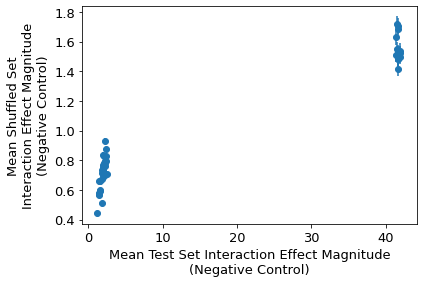

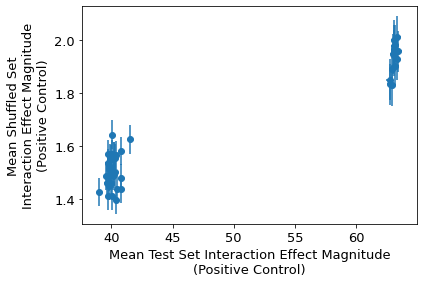

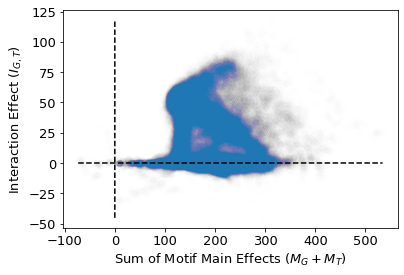

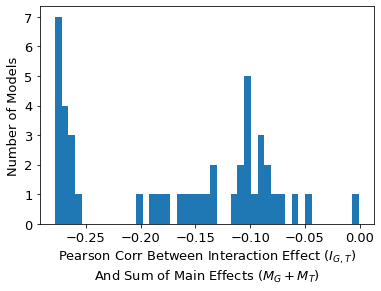

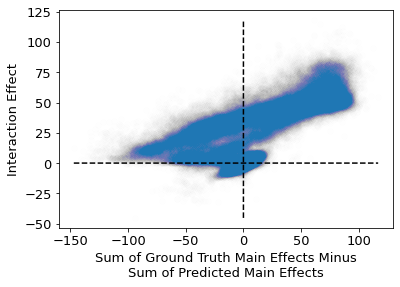

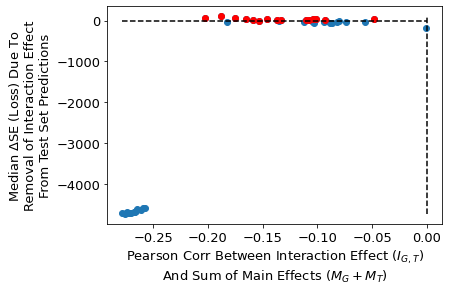

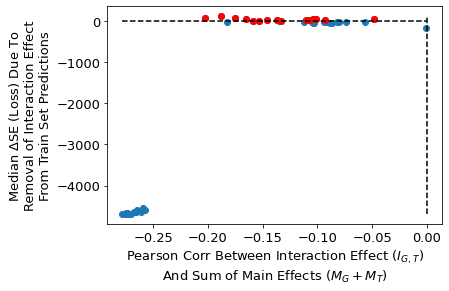

In [83]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc('font', size=13)

#plt.plot(test_intereff_mag_mean, test_intereff_mag_mean, color="black")
plt.errorbar(x=negcontrol_test_intereff_mag_mean,
             y=negcontrol_shuff_intereff_mag_mean,
             xerr=negcontrol_test_intereff_mag_stderr,
             yerr=negcontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect Magnitude\n(Negative Control)")
plt.ylabel("Mean Shuffled Set\nInteraction Effect Magnitude\n(Negative Control)")
plt.show()

plt.errorbar(x=poscontrol_test_intereff_mag_mean,
             y=poscontrol_shuff_intereff_mag_mean,
             xerr=poscontrol_test_intereff_mag_stderr,
             yerr=poscontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect Magnitude\n(Positive Control)")
plt.ylabel("Mean Shuffled Set\nInteraction Effect Magnitude\n(Positive Control)")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel(r"Sum of Motif Main Effects $(M_G + M_T)$")
plt.ylabel(r"Interaction Effect $(I_{G,T})$")
plt.show()

plt.hist(negcontrol_mainvintereff_corrs, bins=45)
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel("Number of Models")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_error_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel("Sum of Ground Truth Main Effects Minus"
           +"\nSum of Predicted Main Effects")
plt.ylabel("Interaction Effect")
plt.show()

xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_test_lossimp_median,
                   #yerr=negcontrol_test_lossimp_stderr,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   #fmt='o'
                   )
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel(r"Median $\Delta$SE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect\nFrom Test Set Predictions")
plt.show()

xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_train_lossimp_median,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol])
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel(r"Median $\Delta$SE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect\nFrom Train Set Predictions")
plt.show()

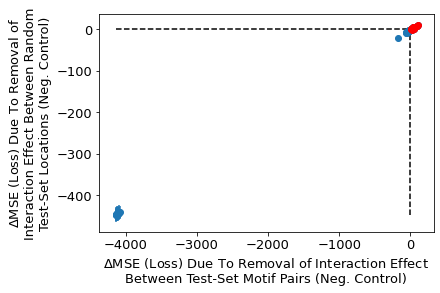

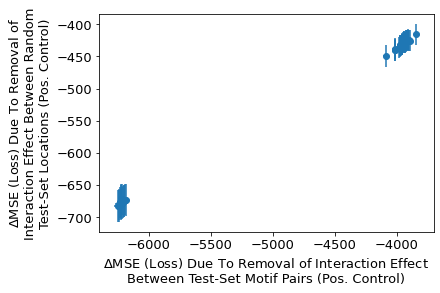

In [56]:
#MEDIAN_MULTIPLIER = 1.353

xyaxis_scatterplot(x=negcontrol_test_lossimp_mean,
                   y=negcontrol_controltest_lossimp_mean,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   xerr=negcontrol_test_lossimp_stderr,
                   yerr=negcontrol_controltest_lossimp_stderr,
                   fmt='o'
                   )
plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Neg. Control)")
plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Neg. Control)")
plt.show()

plt.errorbar(x=poscontrol_test_lossimp_mean,
                   y=poscontrol_controltest_lossimp_mean,
                   xerr=poscontrol_test_lossimp_stderr,
                   yerr=poscontrol_controltest_lossimp_stderr,
                   fmt='o'
                   )
plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Pos. Control)")
plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Pos. Control)")
plt.show()

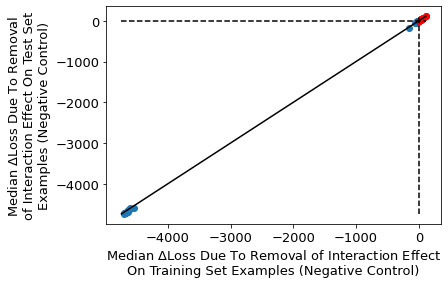

In [57]:
xyaxis_scatterplot(negcontrol_train_lossimp_median,
                   negcontrol_test_lossimp_median,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   withxeqy=True)
plt.ylabel("Median $\Delta$Loss Due To Removal"+"\n"
           +"of Interaction Effect On Test Set\nExamples (Negative Control)")
plt.xlabel("Median $\Delta$Loss Due To "
           +"Removal of Interaction Effect\nOn Training Set Examples (Negative Control)")
plt.show()

In [ ]:
test_toanalyze_maineffpreds_loss.shape

AttributeError: ignored

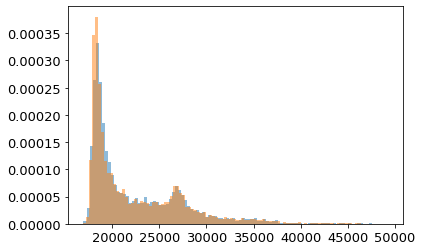

73.6531400680542


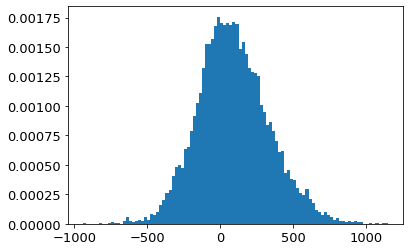

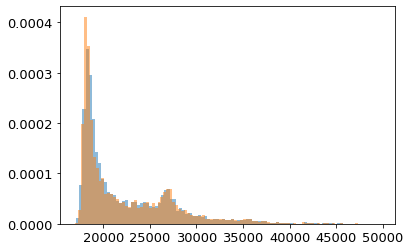

69.51873207092285


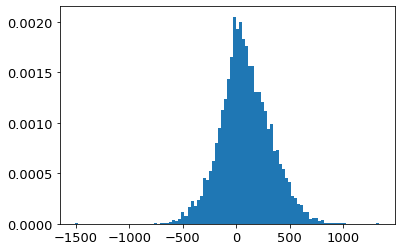

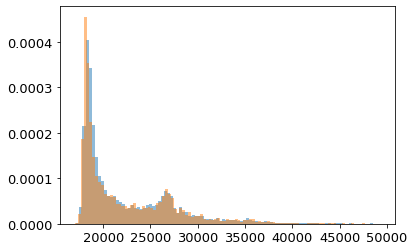

104.20003890991211


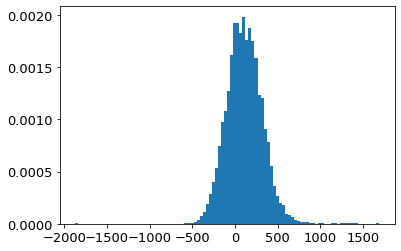

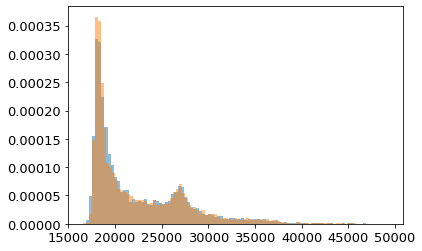

14.741971015930176


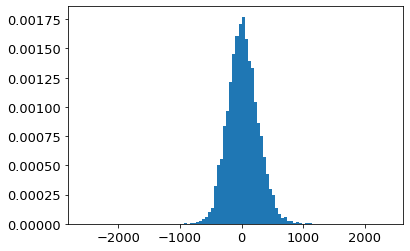

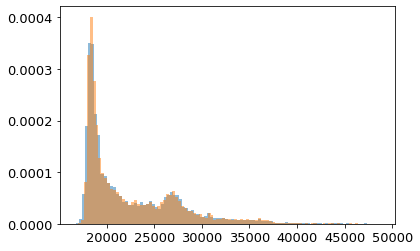

19.93597412109375


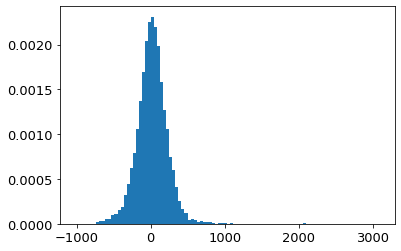

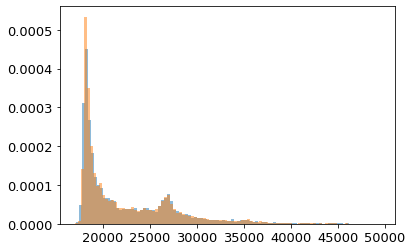

11.99551010131836


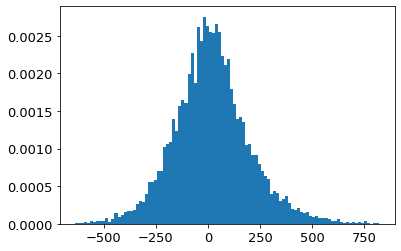

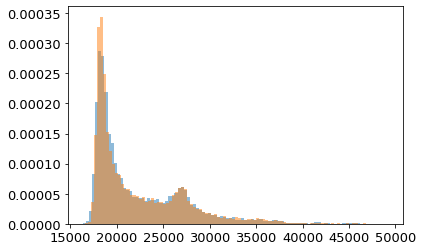

27.301191329956055


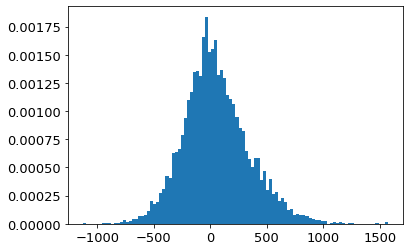

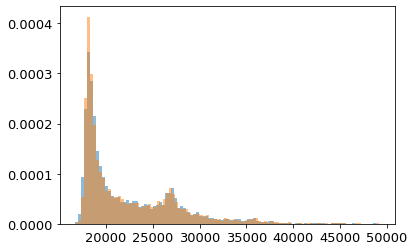

3.2432069778442383


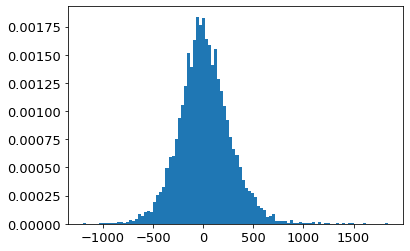

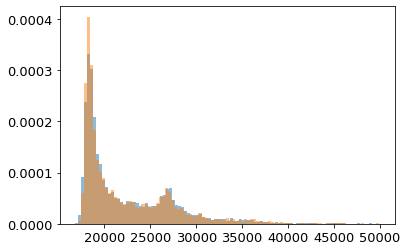

46.73348522186279


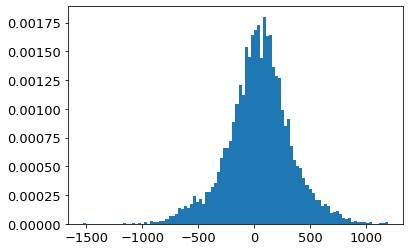

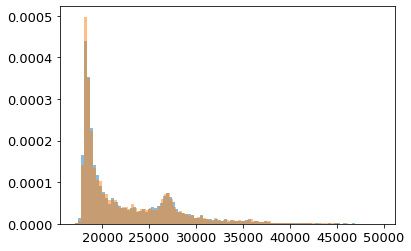

12.705856323242188


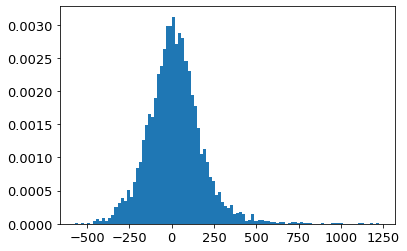

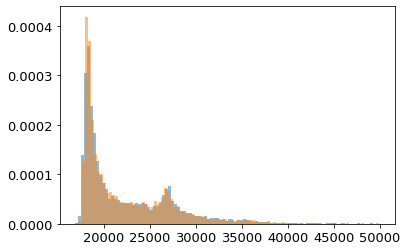

42.887858390808105


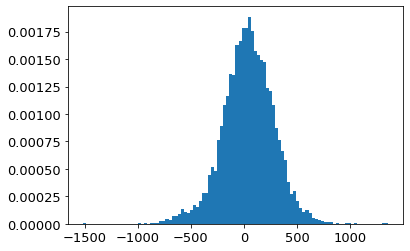

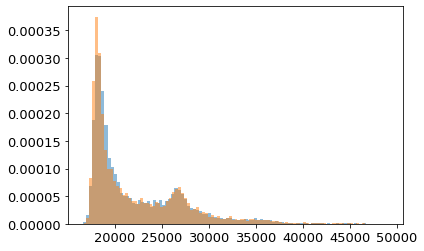

32.99003982543945


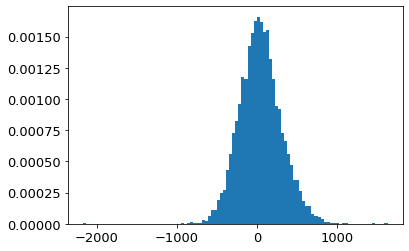

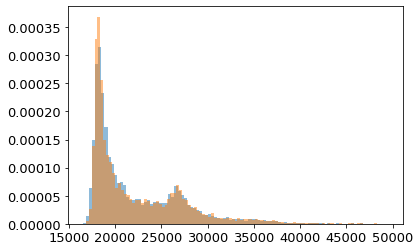

-1.7724285125732422


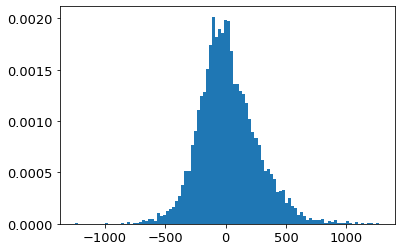

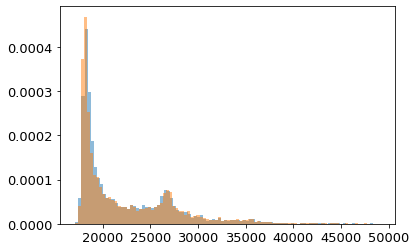

38.161766052246094


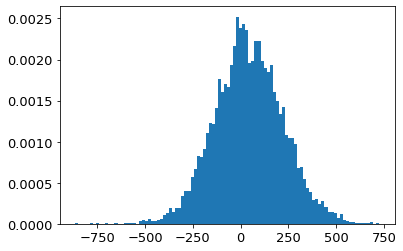

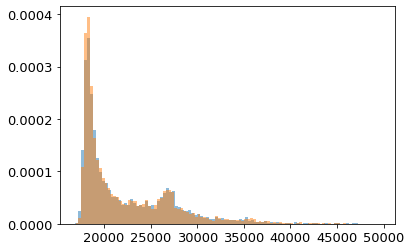

4.324189186096191


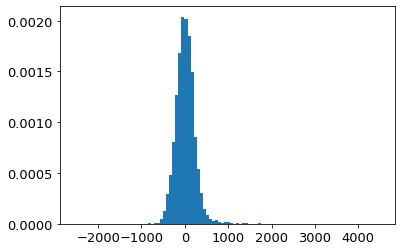

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


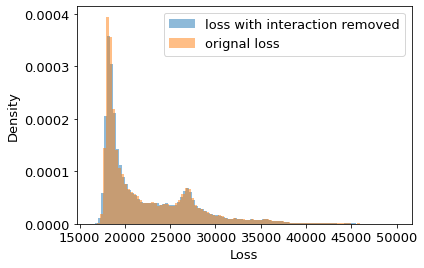

Median paired difference: 31.887304306030273


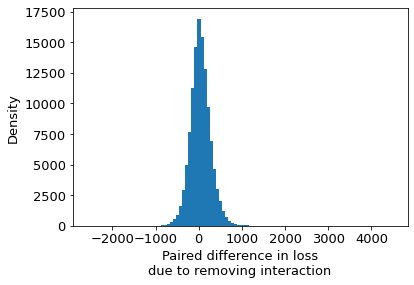

In [58]:
origpred_losses = []
maineff_losses = []
for modeltoplot in failed_paired_wilcoxon_negcontrol:
  single_model_result = negcontrol_results[modeltoplot]
  test_toanalyze_maineffpreds_loss=single_model_result.test_toanalyze_maineffpreds_loss
  test_toanalyze_origpreds_loss=single_model_result.test_toanalyze_origpreds_loss
  difference = test_toanalyze_maineffpreds_loss-test_toanalyze_origpreds_loss
  
  origpred_losses.extend(test_toanalyze_origpreds_loss)
  maineff_losses.extend(test_toanalyze_maineffpreds_loss)
  
  plt.hist(test_toanalyze_maineffpreds_loss, alpha=0.5, density=True, bins=100)
  plt.hist(test_toanalyze_origpreds_loss, alpha=0.5, density=True, bins=100)
  plt.show()
  print(np.median(difference))
  plt.hist(difference, density=True, bins=100)
  plt.show()
  
handles = []
handles.append(plt.hist(maineff_losses, alpha=0.5, density=True, bins=100))
handles.append(plt.hist(origpred_losses, alpha=0.5, density=True, bins=100))
plt.legend(handles, labels=["loss with interaction removed", "orignal loss"])
plt.xlabel("Loss")
plt.ylabel("Density")
plt.show()
difference = np.array(maineff_losses)-np.array(origpred_losses)
print("Median paired difference:", np.median(difference))
plt.hist(difference, bins=100)
plt.xlabel("Paired difference in loss\ndue to removing interaction")
plt.ylabel("Density")
plt.show()

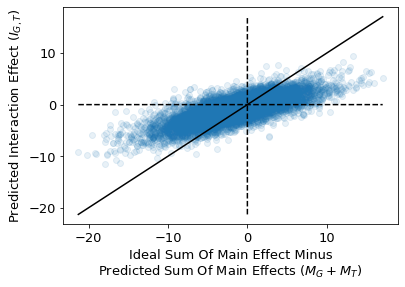

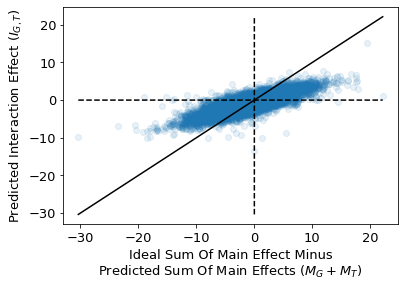

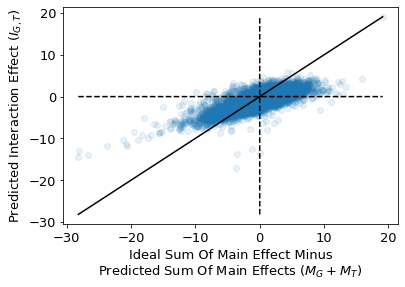

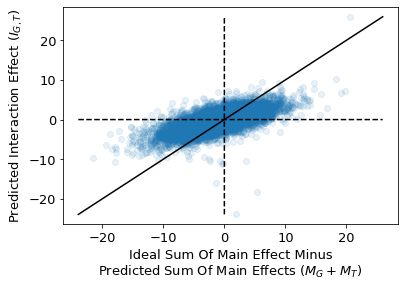

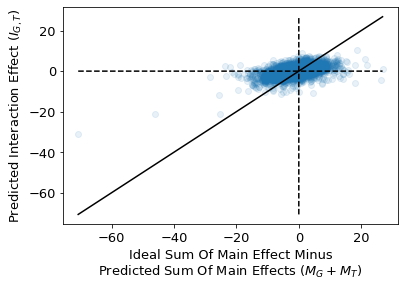

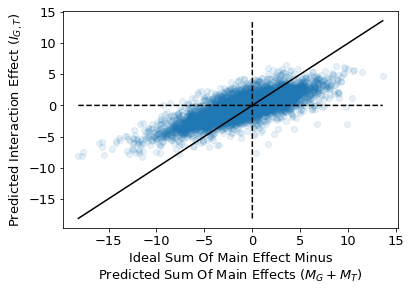

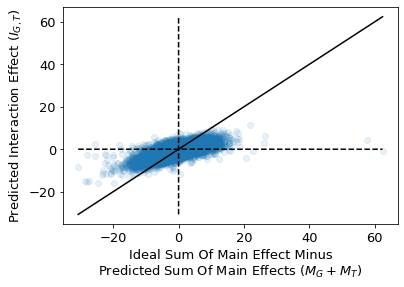

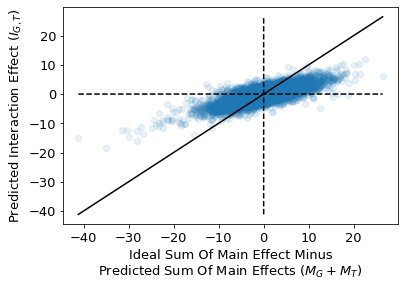

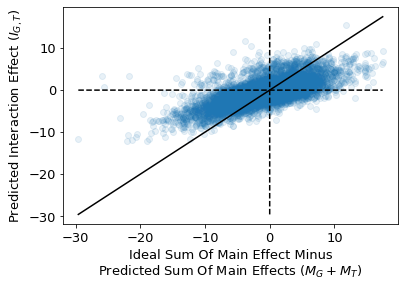

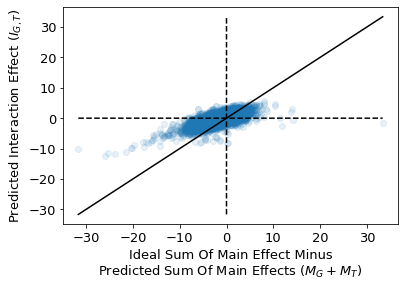

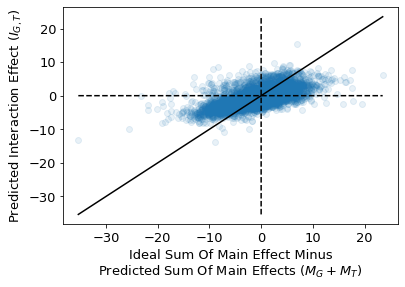

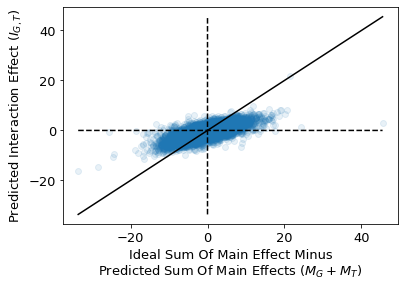

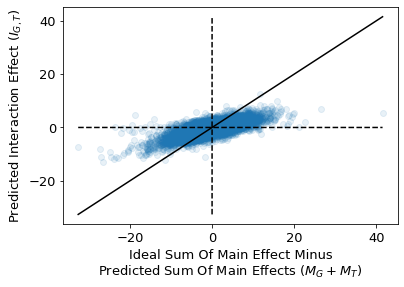

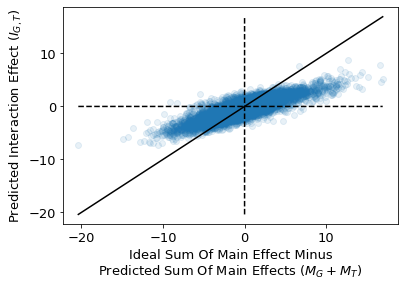

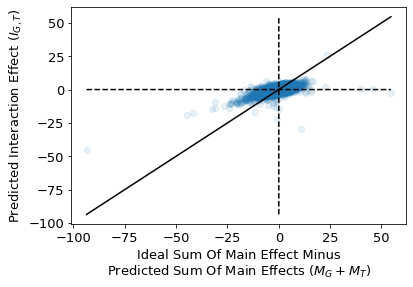

In [59]:
for modeltoplot in failed_paired_wilcoxon_negcontrol:
  single_model_result = negcontrol_results[modeltoplot]
  test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

  test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs

  test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)

  xyaxis_scatterplot(test_main_eff_error, test_intereff, withxeqy=True, alpha=0.1)
  plt.xlabel("Ideal Sum Of Main Effect Minus\nPredicted Sum Of Main Effects ($M_{G} + M_{T}$)")
  plt.ylabel("Predicted Interaction Effect ($I_{G,T}$)")
  plt.show()

In [ ]:
negcontrol_results.keys()

odict_keys(['negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed200_dmeaz.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0_seed400_pslhq.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed500_ubnbf.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.001_seed200_gdluv.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed300_rltff.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.001_seed100_nomup.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed400_qlptx.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.0001_seed200_tuyuq.h5', 'negcontrol_model-anscombemse_arch3_l1reg-0.001_seed300_mqdhx.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed500_msloc.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed300_vwlzj.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed400_vyqvb.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0.001_seed100_tiefn.h5', 'negcontrol_model-anscombemse_arch1_l1reg-0

0.2029744196879452


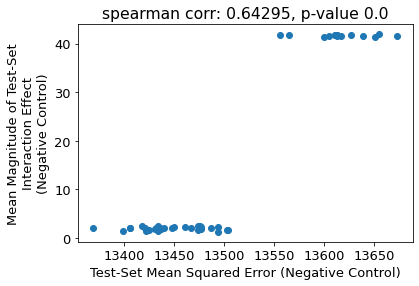

0.15166597219582323


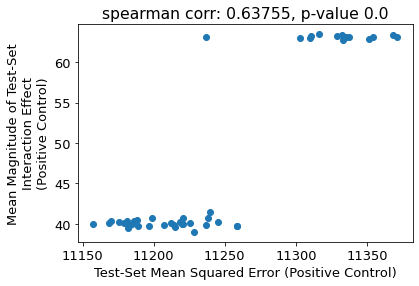

In [60]:
import scipy.stats

def plot_mse_v_intererr(results, description):
  xaxis = np.array([np.mean(results[modelname].overall_test_loss)
              for modelname in results.keys()])
  yaxis = np.array([np.mean(np.abs(results[modelname]
           .test_toanalyze_interactioneffectdata.inter_eff))
           for modelname in results])
  m, b = np.polyfit(xaxis, yaxis, 1)
  print(m)
  plt.scatter(xaxis, yaxis)
  #plt.plot(xaxis, m*xaxis + b, color="black")
  plt.xlabel("Test-Set Mean Squared Error ("+description+")")
  plt.ylabel("Mean Magnitude of Test-Set\nInteraction Effect\n("
             +description+")")
  spearman = scipy.stats.spearmanr(xaxis, yaxis)
  plt.title("spearman corr: "
            +str(np.round(spearman.correlation,5))+
            ", p-value "+str(np.round(spearman.pvalue,5)))
  plt.show()
  

plot_mse_v_intererr(results=negcontrol_results,
                    description="Negative Control")
plot_mse_v_intererr(results=poscontrol_results,
                    description="Positive Control")

In [110]:
import pandas
from collections import OrderedDict

def extract_from_results(arr, extraction_func):
  return [extraction_func(x) for x in arr.values()]

def prepare_results_summary(results):
  fields = [("modelfiles", list(results.keys()))]
  fields += [
  #("test lossimp", extract_from_results(arr=results,
  #extraction_func=lambda x: np.mean(x.test_loss) )),
  ("mean abs test toanalyze inter eff data", extract_from_results(arr=results,
  extraction_func=lambda x: np.mean(np.abs(x.test_toanalyze_interactioneffectdata.inter_eff)))),
  ("test lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("test lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("test v controltest lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_lossimp_mannwhit.pvalue)),
  ("test v controltest intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_intereff_mag_mannwhit.pvalue)),
  ("train lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("train lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("train v controltrain lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_lossimp_mannwhit.pvalue)),
  ("train v controltrain intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_intereff_mag_mannwhit.pvalue)),
  ("test intereff - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_intereff_wilcoxon.pvalue)),
  ("test v shuff intereff mag mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_intereff_mag_mannwhit.pvalue)),
  ("test v shuff lossimp mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_lossimp_mannwhit.pvalue)),
  ]
  return pandas.DataFrame(OrderedDict(fields))

negcontrol_results_summary = prepare_results_summary(negcontrol_results)
poscontrol_results_summary = prepare_results_summary(poscontrol_results)

In [111]:
negcontrol_results_summary

modelfiles  ...  test v shuff lossimp mannwhit
0   negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
1   negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
2   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                  2.035514e-123
3   negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
4   negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
5   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.000000e+00
6   negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
7   negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
8   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.000000e+00
9   negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
10  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
11  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.000000e+00
12  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
13  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
14  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                  8.524395e-149
15  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
16  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   0.000000e+00
17  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.000000e+00
18  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
19  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
20  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   4.801015e-04
21  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
22  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
23  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.000000e+00
24  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
25  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   5.470516e-14
26  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   2.708360e-05
27  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
28  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   9.427493e-13
29  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   6.625811e-01
30  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
31  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
32  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   4.225962e-43
33  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
34  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   6.021314e-10
35  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   3.728110e-43
36  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
37  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   3.273534e-22
38  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.000000e+00
39  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
40  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.000000e+00
41  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   9.630528e-01
42  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.000000e+00
43  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   4.0484

In [69]:
poscontrol_results_summary

modelfiles  ...  test v shuff lossimp mannwhit
0   poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
1   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
2   poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
3   poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
4   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
5   poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
6   poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
7   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
8   poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
9   poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
10  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
11  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
12  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
13  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
14  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
15  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
16  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
17  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
18  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
19  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
20  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
21  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
22  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
23  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
24  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
25  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
26  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
27  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
28  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
29  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
30  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
31  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
32  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
33  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
34  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
35  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
36  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
37  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
38  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
39  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
40  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            1.0
41  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            1.0
42  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            1.0
43  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                         

WilcoxonResult(statistic=16443682.0, pvalue=0.0033301321424699672)
0.002234319298959838


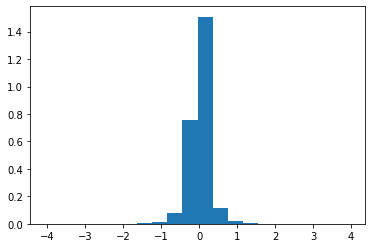

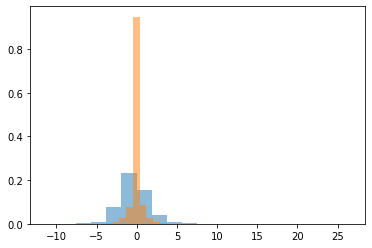

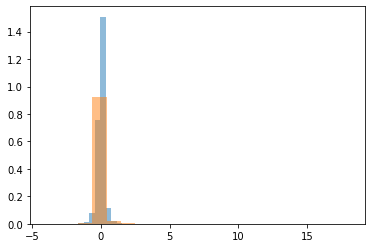

In [27]:
#sanity check single model

interaction_analysis = negcontrol_results["negcontrol_model-anscombemse_arch3_l1reg-0.0_seed100_ydtvz.h5"]
#interaction_analysis = poscontrol_results["poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5"]

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats

print(scipy.stats.wilcoxon(
    x=interaction_analysis.test_toanalyze_lossimprovement,
    alternative="greater"))
print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
plt.hist(interaction_analysis.test_toanalyze_lossimprovement, density=True, bins=20)
plt.show()

plt.hist(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.show()

"""plt.hist(np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.test_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.hist(np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.shuff_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.show()""" #doesn't work cos sum on main off on dn shuff seqs can be tiny

#print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
#print(np.median(interaction_analysis.shuff_toanalyze_lossimprovement))

plt.hist(interaction_analysis.test_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.show()